In [1]:
from importlib import reload
import article
reload(article)
from article import *

import warnings
warnings.simplefilter("ignore")

torch.device("cuda" if torch.cuda.is_available() else "cpu")

2024-10-23 23:06:02.441507: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 23:06:02.524897: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 23:06:02.526254: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 23:06:04.125315: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


device(type='cpu')

# MNIST Dataset

## Data loading

2024-10-23 23:06:09.367496: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.
2024-10-23 23:06:09.601621: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 204800000 exceeds 10% of free system memory.
2024-10-23 23:06:11.110940: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2024-10-23 23:06:11.131719: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.
2024-10-23 23:06:11.396042: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


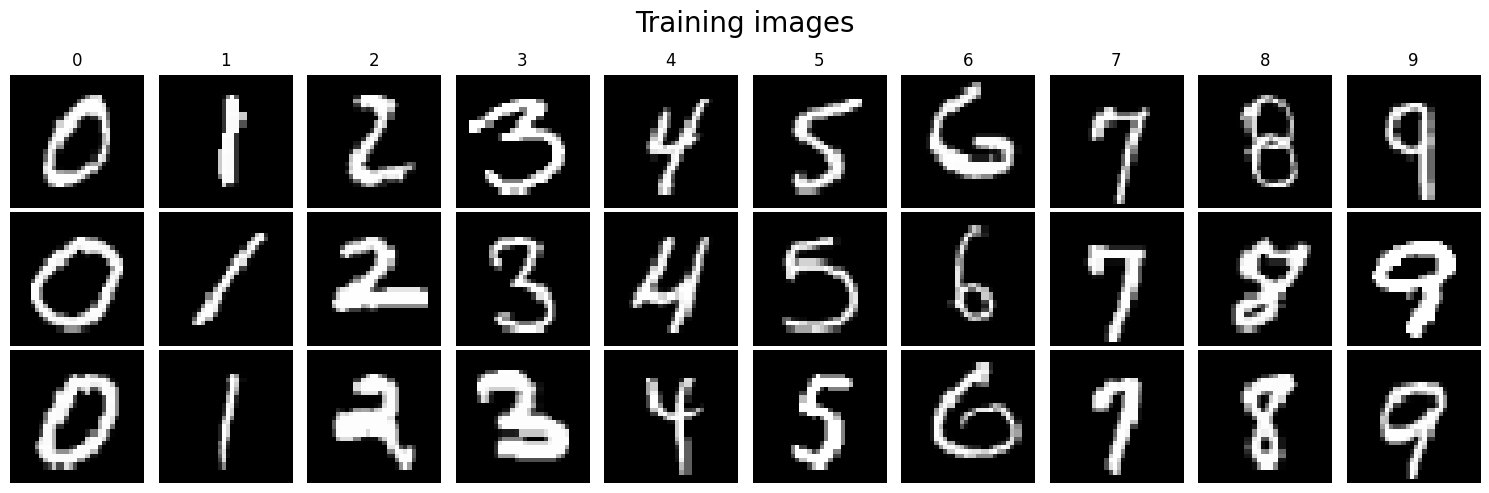

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset('MNIST')

In [3]:
train_loader, val_loader, test_loader = dataloaders(X_train, y_train, X_val, y_val, X_test, y_test)

## Convolutional Variational Autoencoders

### Classic VAE

Number of parameters: 52621
Model loaded from Models/MNIST/classic.pth


<IPython.core.display.Latex object>

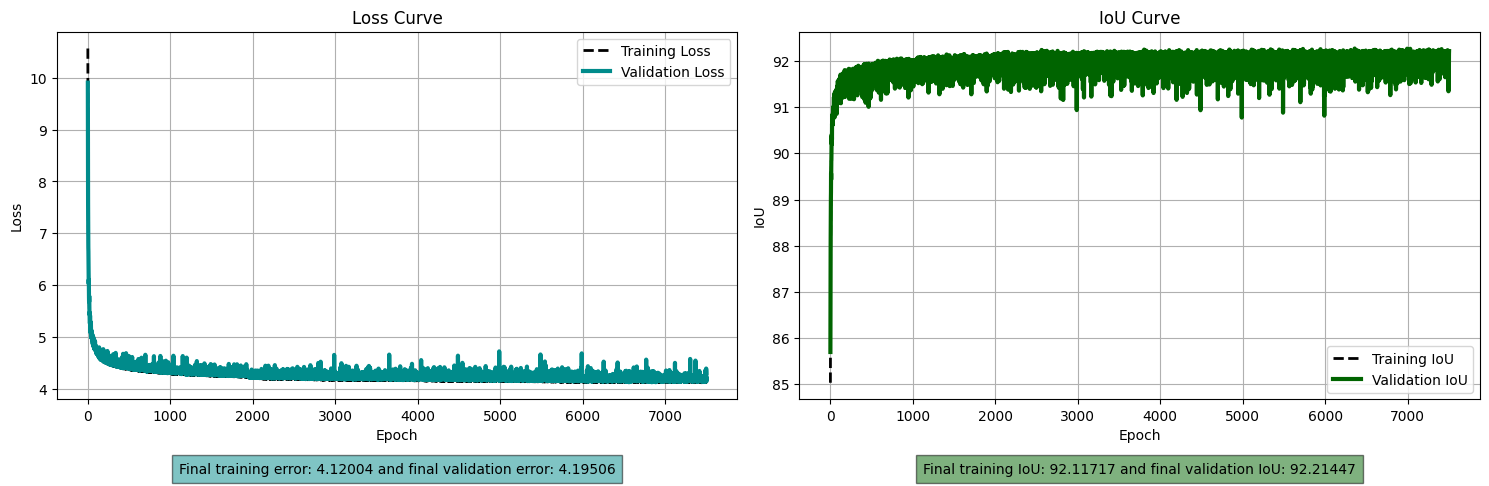

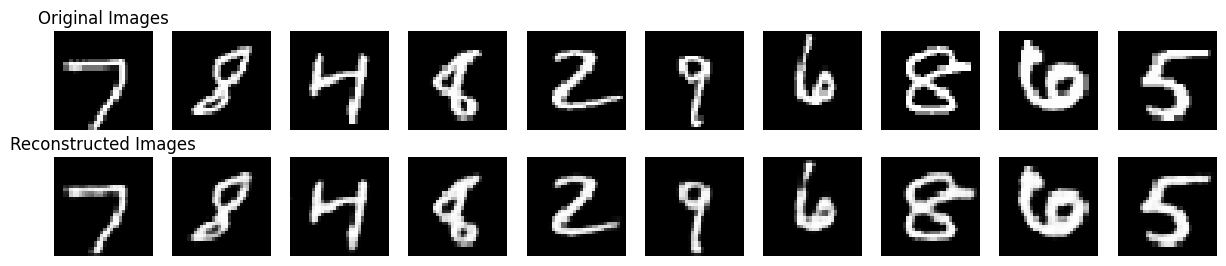

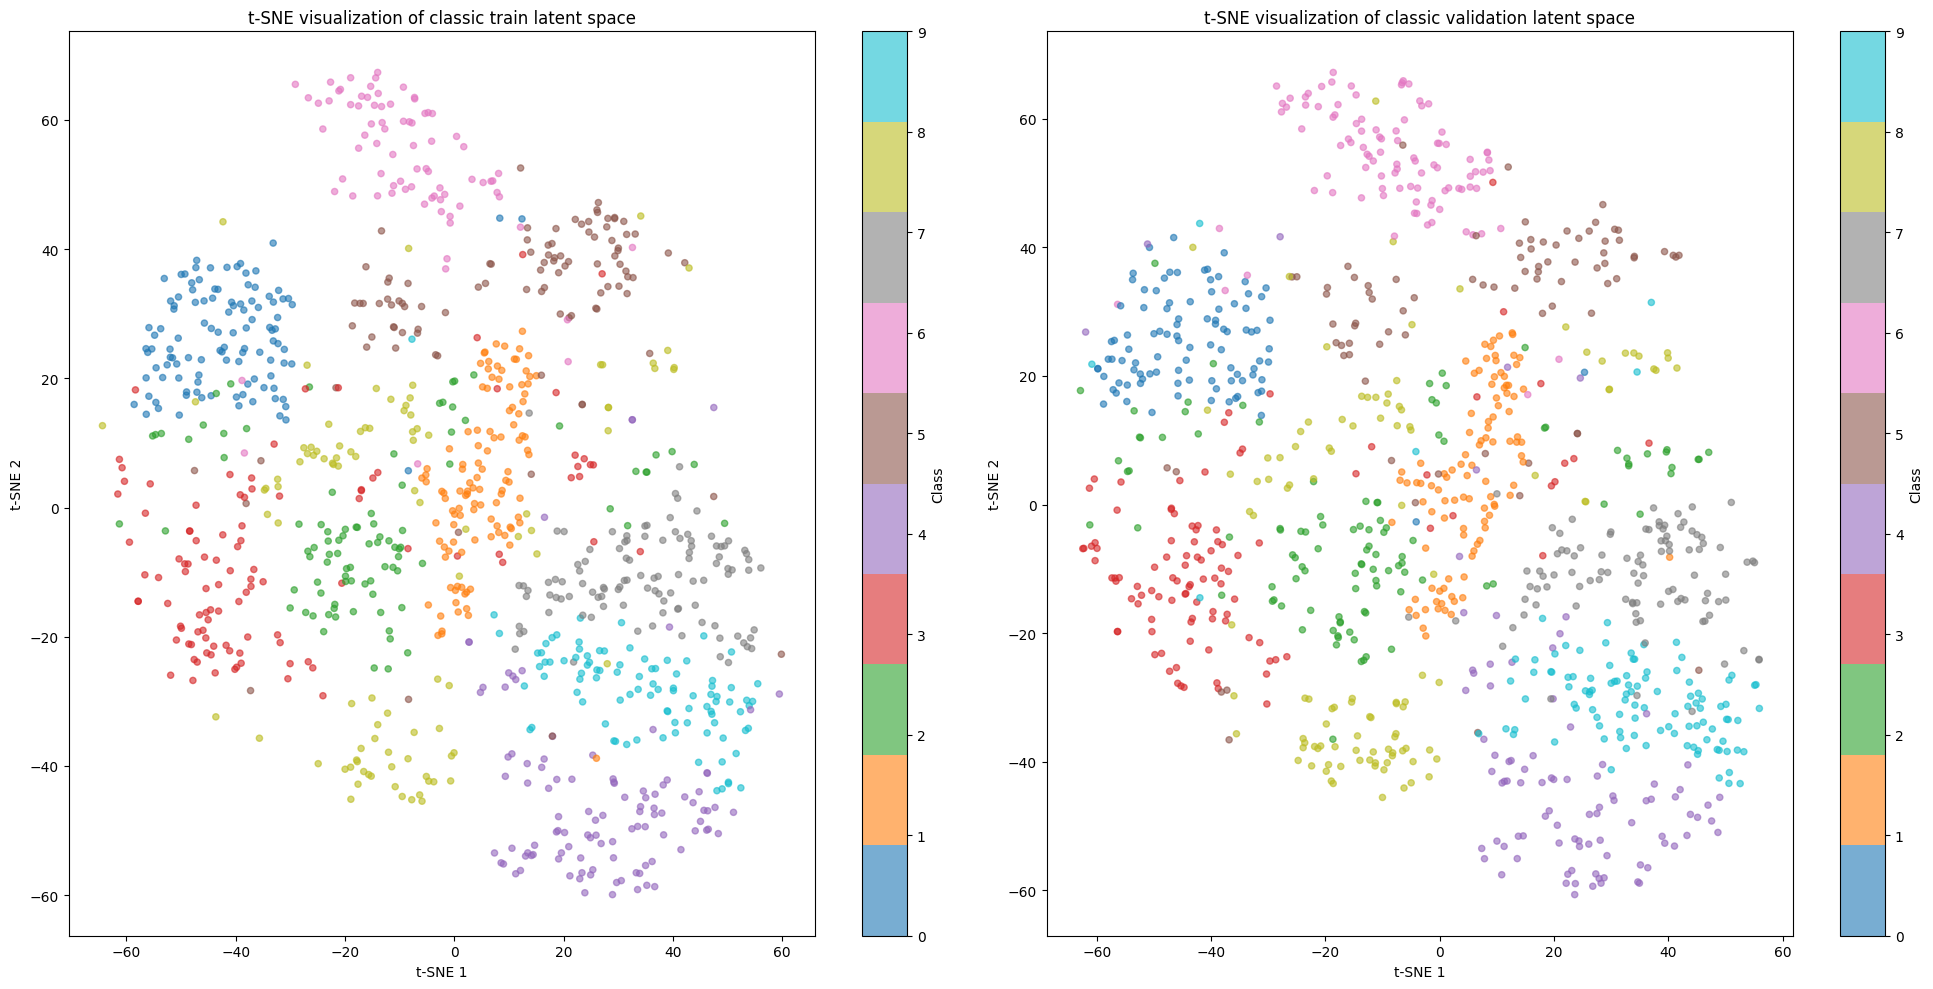

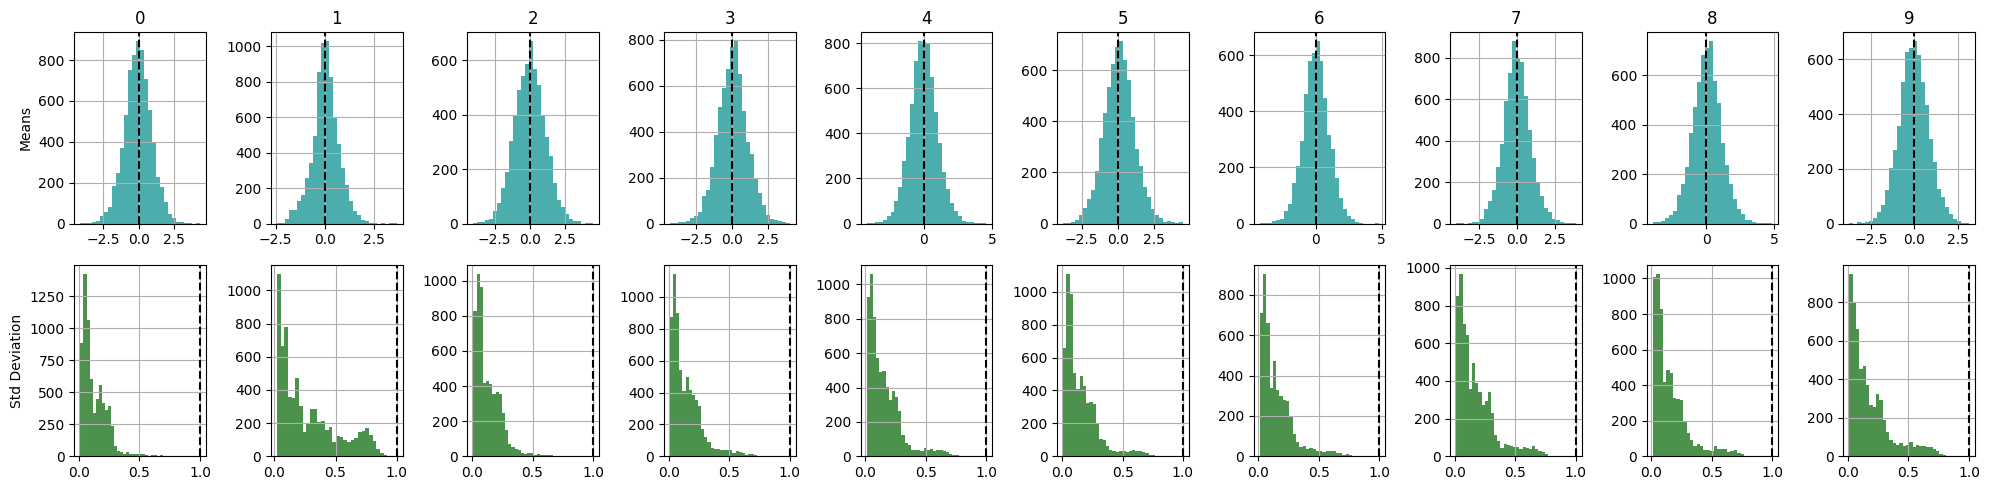

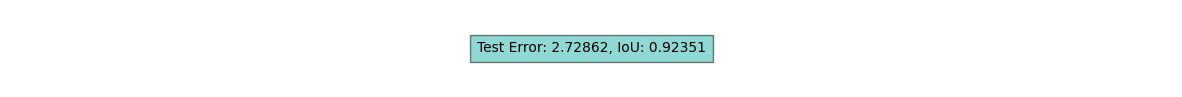

CPU times: user 1min, sys: 1.41 s, total: 1min 1s
Wall time: 47.7 s


In [4]:
%%time
set_seed()
vae1 = Classic_VAE(dataset='MNIST', train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
print(f"Number of parameters: {vae1.count_parameters()}")
vae1.load_and_plot('Models/MNIST/classic.pth', train_loader, val_loader) # coef=10**-2
vae1.test(test_loader, coef=0)

### VAE-NMF

Number of parameters: 51008 (-3.07%)
Model loaded from Models/MNIST/nmf.pth


<IPython.core.display.Latex object>

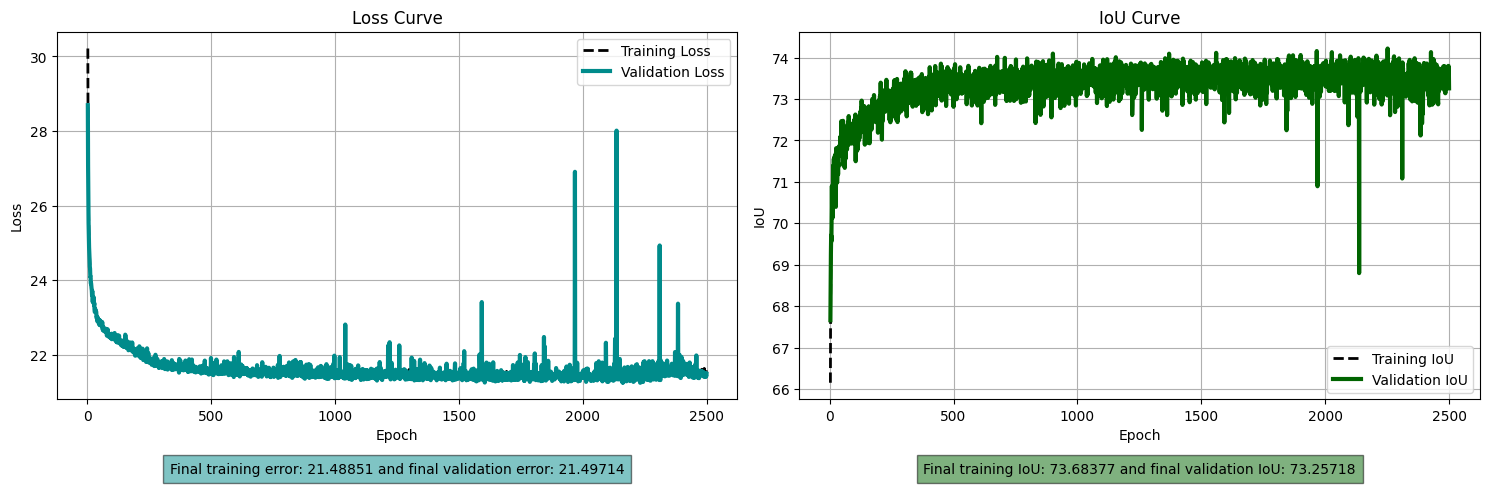

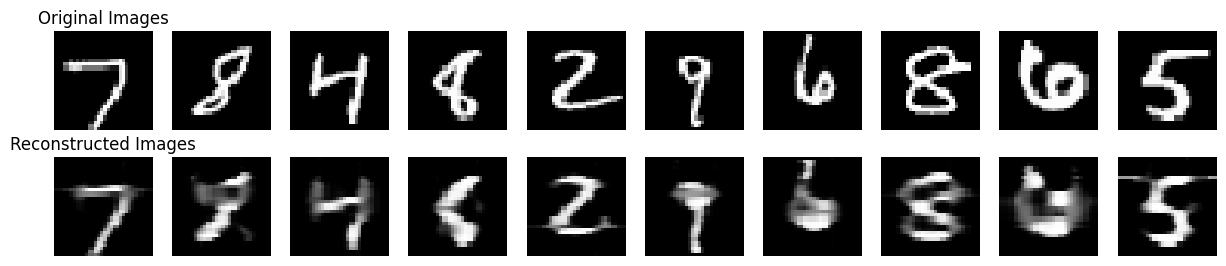

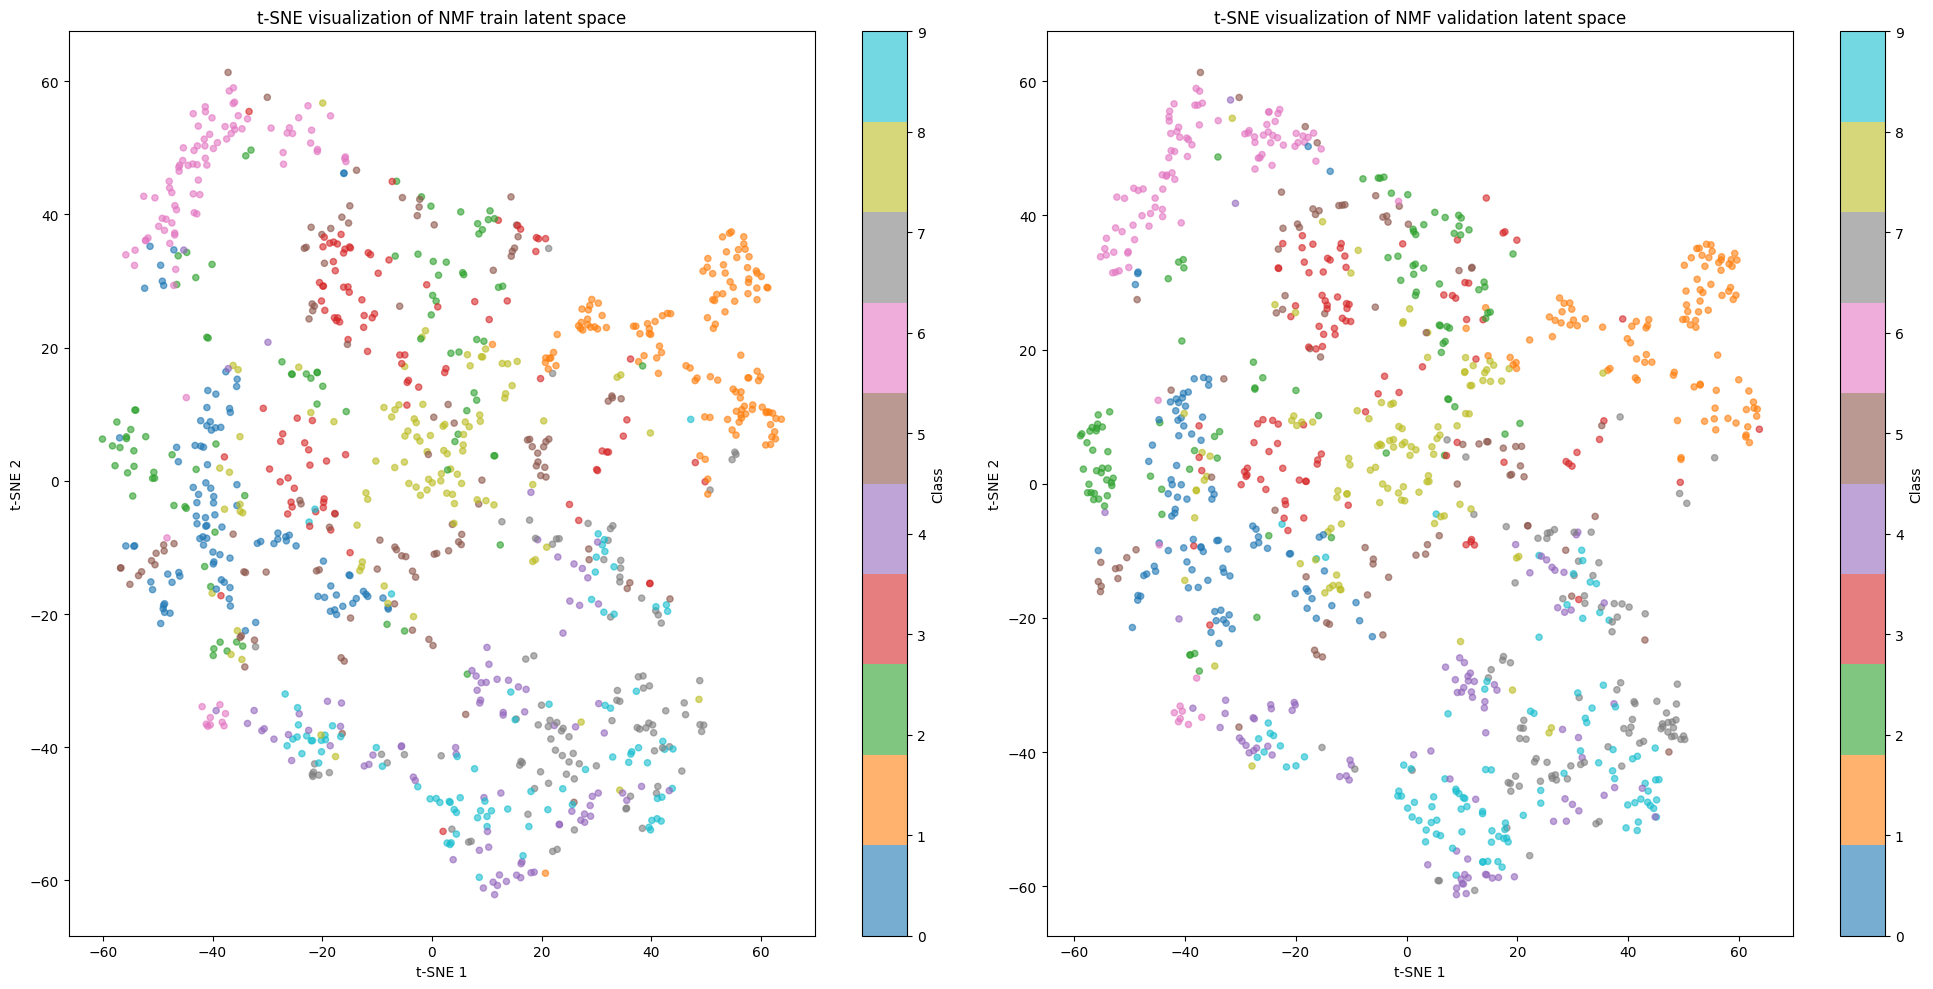

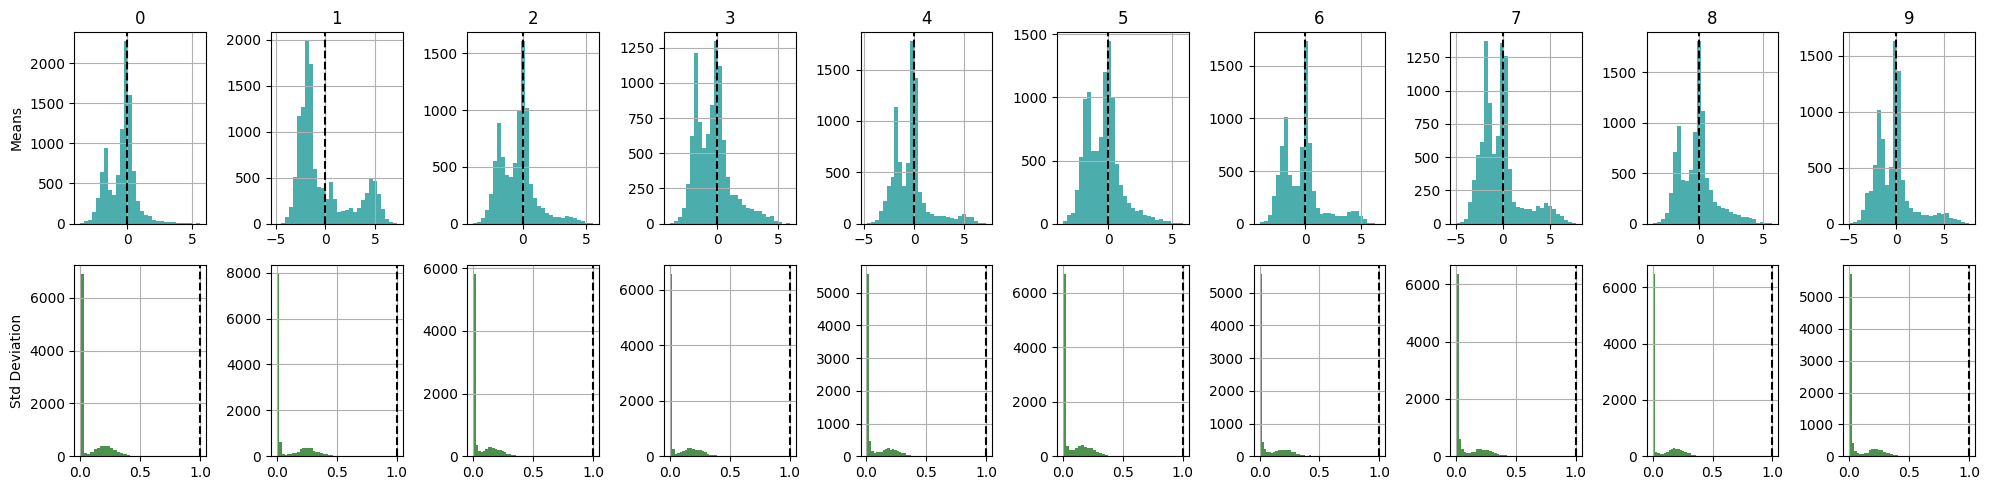

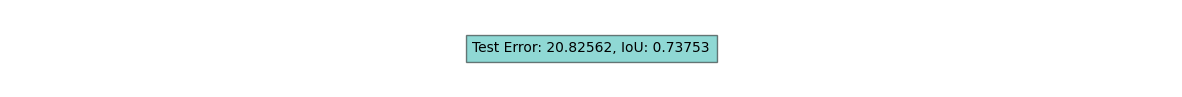

CPU times: user 57.1 s, sys: 1.45 s, total: 58.6 s
Wall time: 47.1 s


In [5]:
%%time
set_seed()
vae2 = VAE_NMF(dataset='MNIST', rank=3, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
reduction(vae1, vae2)
vae2.load_and_plot('Models/MNIST/nmf.pth', train_loader, val_loader) # coef=10**-3
vae2.test(test_loader, coef=0)

### VAE-NTD

Number of parameters: 43696 (-16.96%)
Model loaded from Models/MNIST/ntd.pth


<IPython.core.display.Latex object>

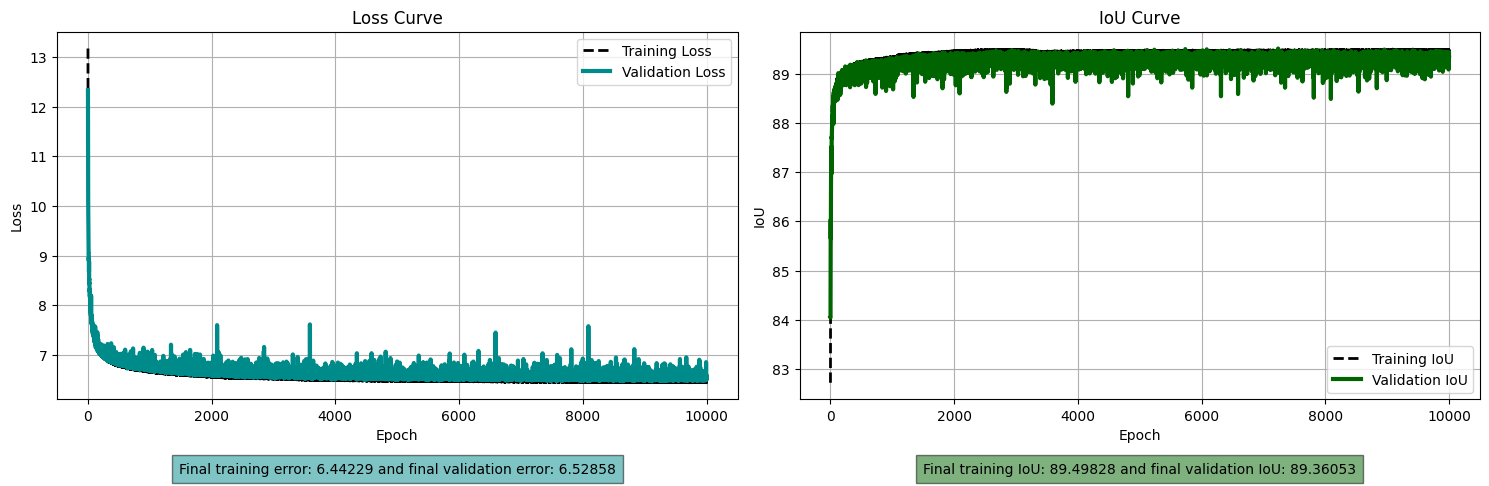

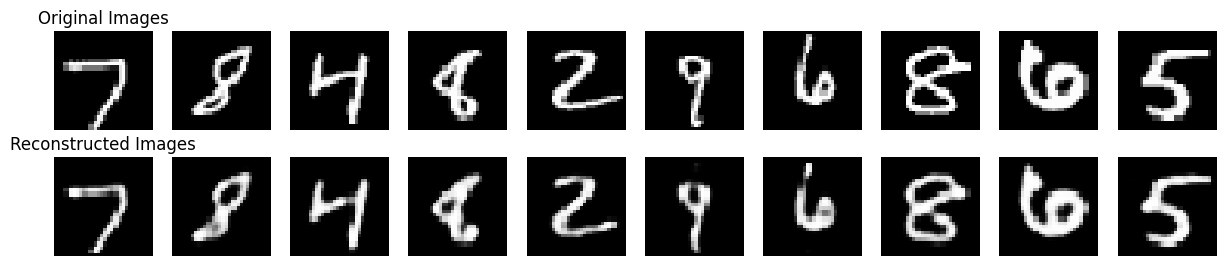

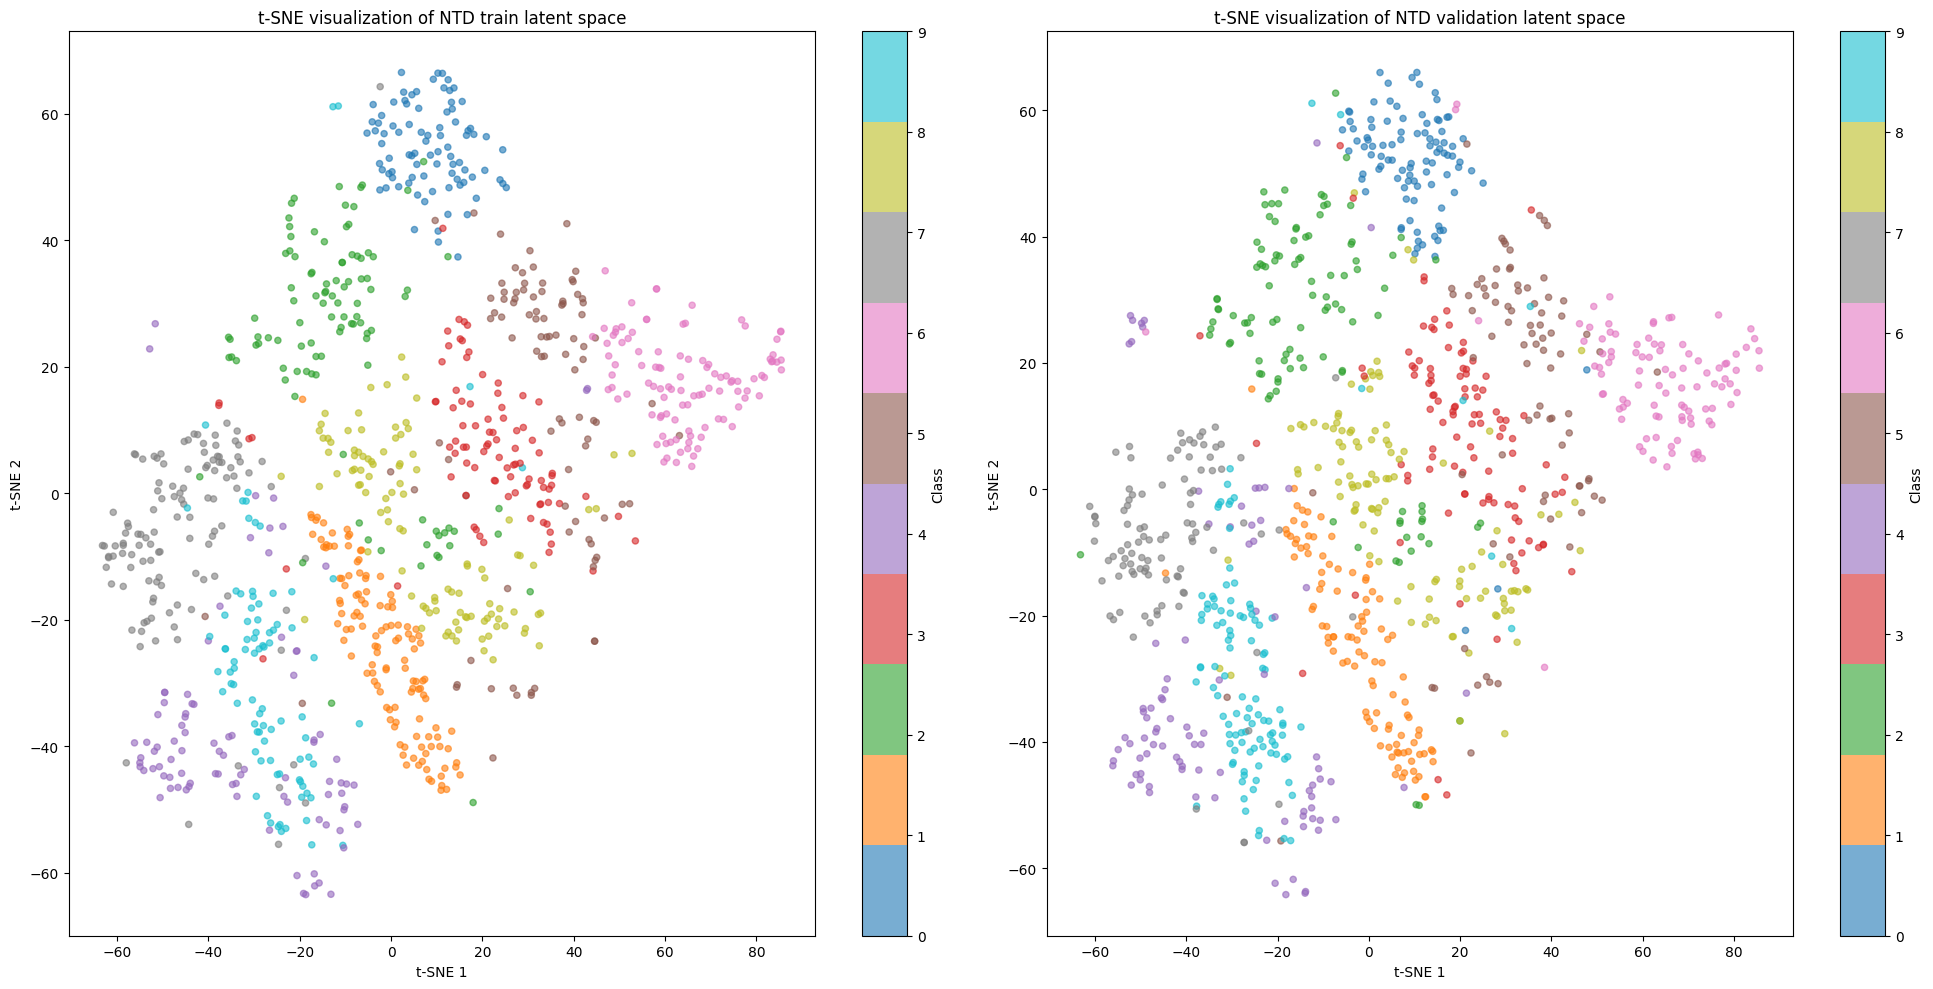

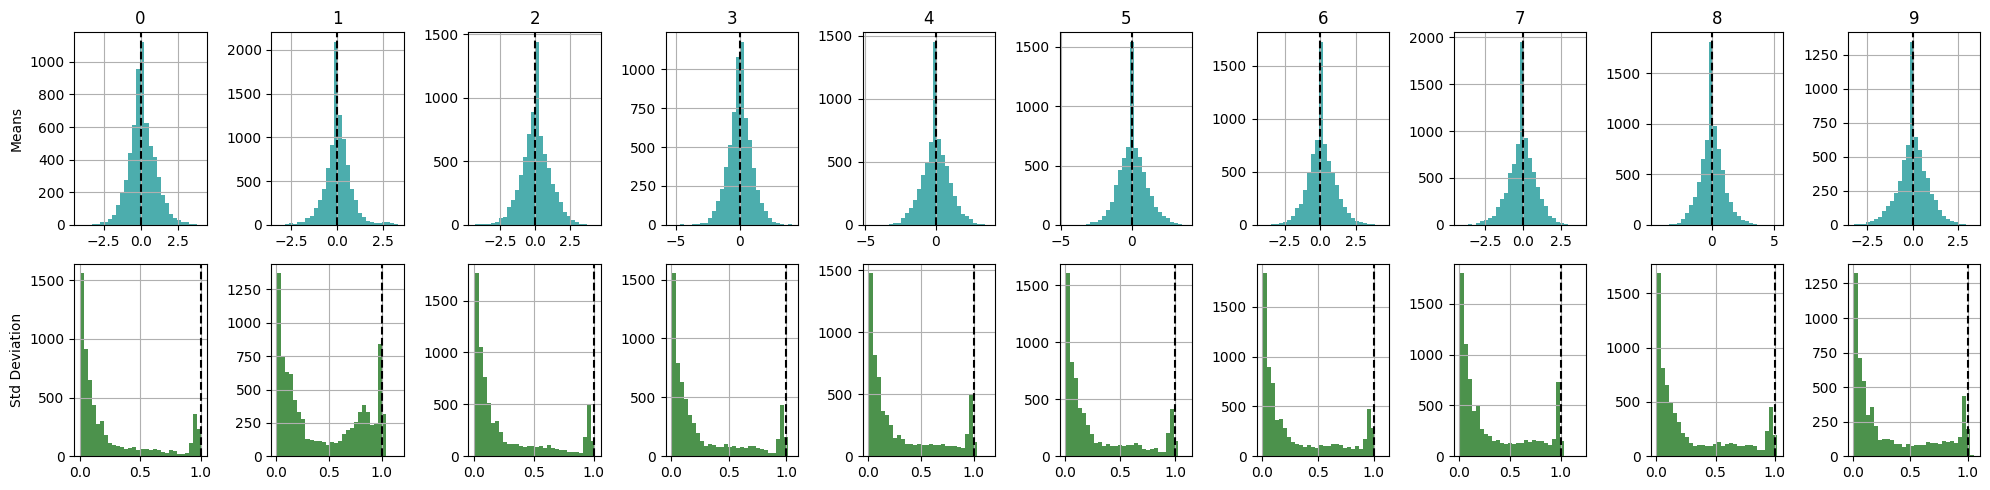

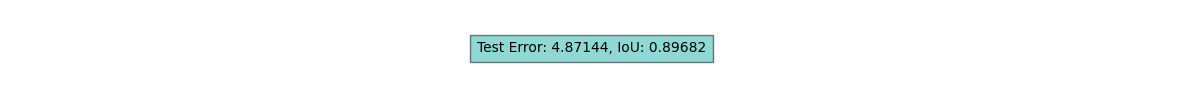

CPU times: user 59.1 s, sys: 1.63 s, total: 1min
Wall time: 47.4 s


In [6]:
%%time
set_seed()
vae3 = VAE_NTD(dataset='MNIST', rank=[8, 8, 72], train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
reduction(vae1, vae3)
vae3.load_and_plot('Models/MNIST/ntd.pth', train_loader, val_loader) # coef=10**-2
vae3.test(test_loader, coef=0)

### VAE-CPD-NN

Number of parameters: 43184 (-17.93%)
Model loaded from Models/MNIST/cpd_nn.pth


<IPython.core.display.Latex object>

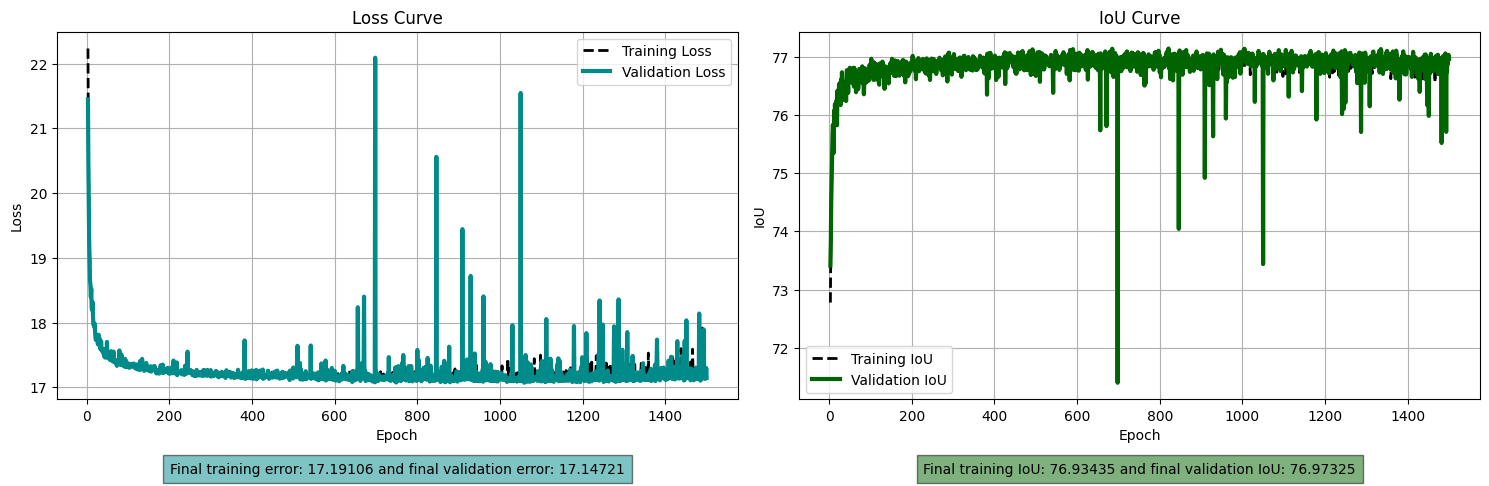

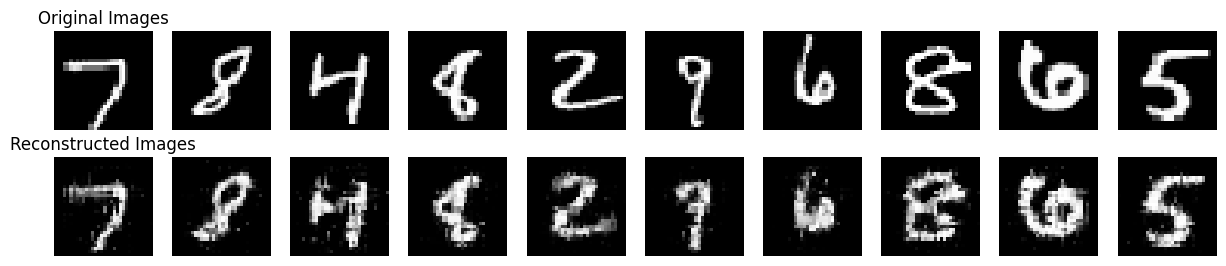

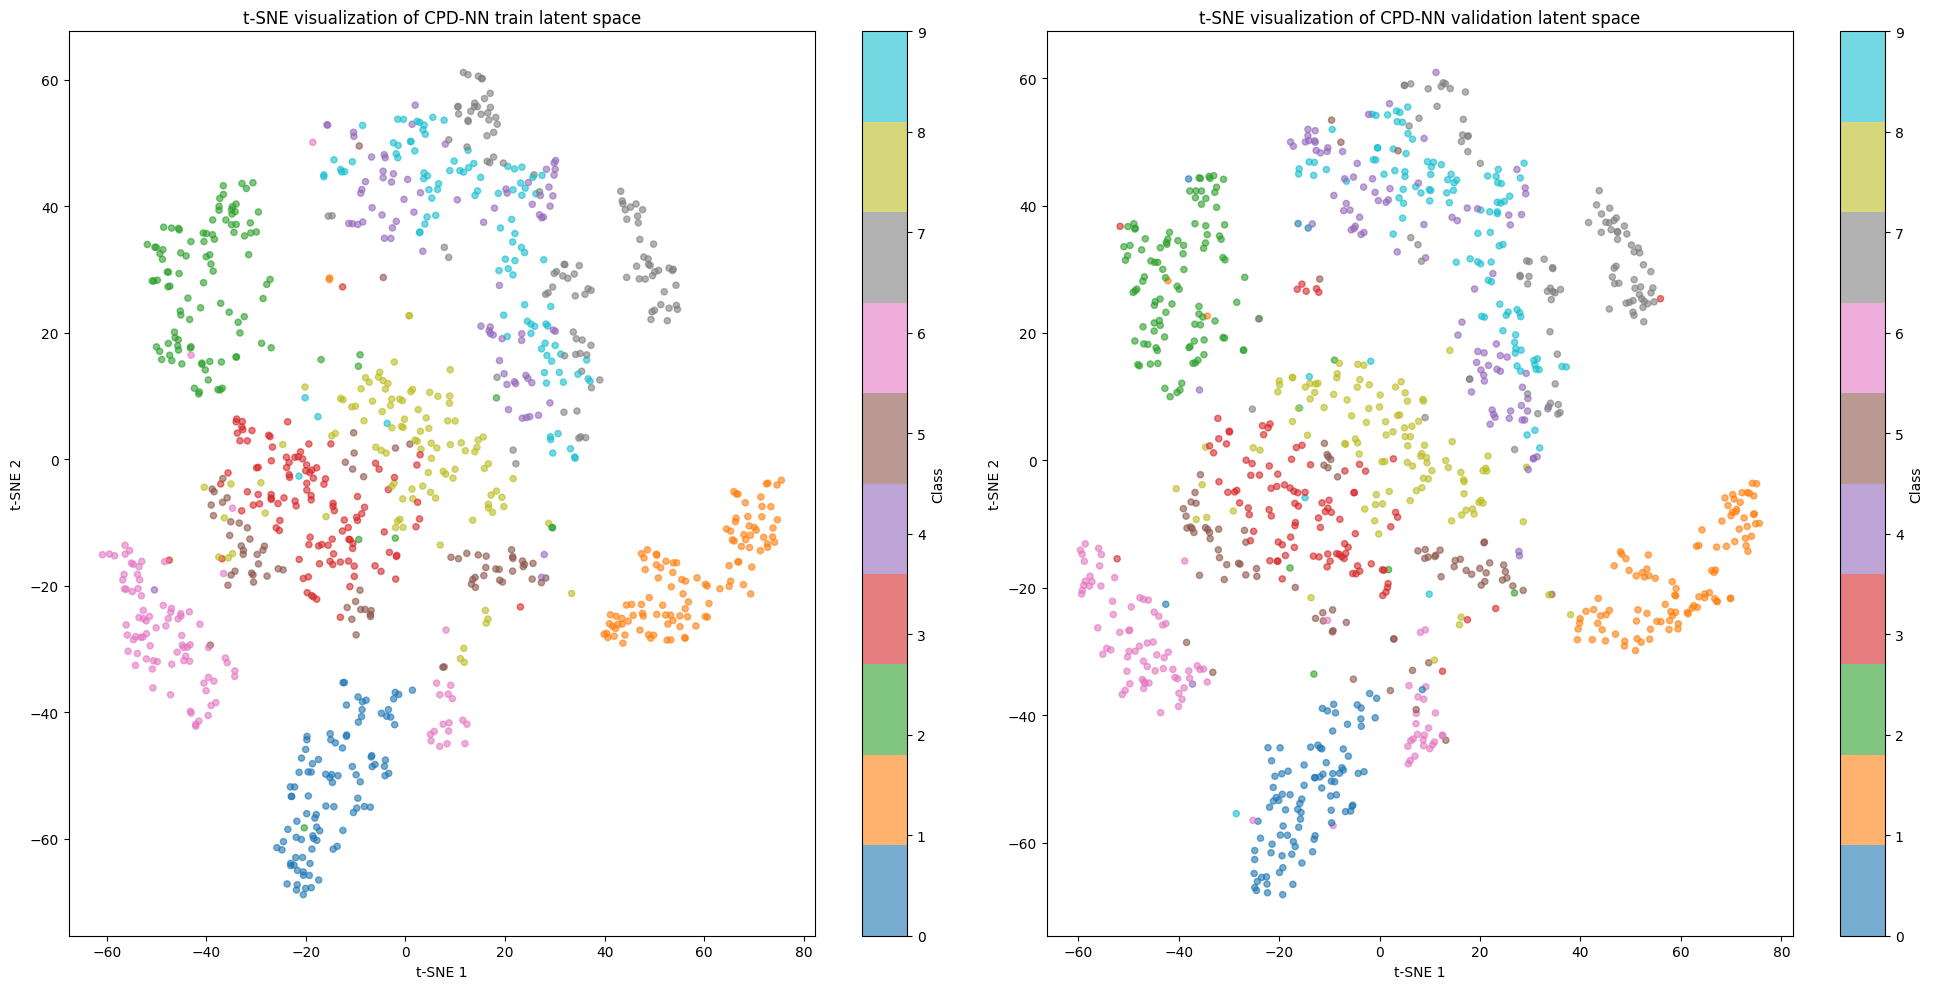

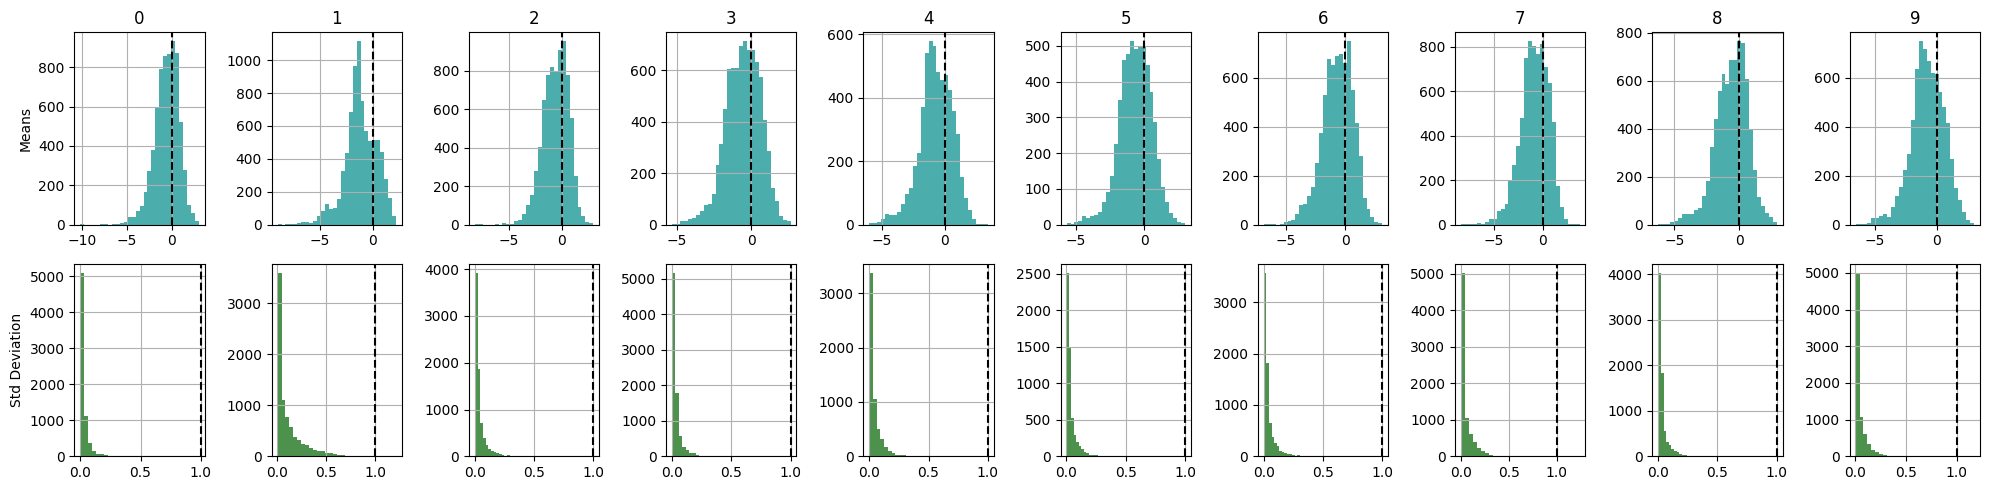

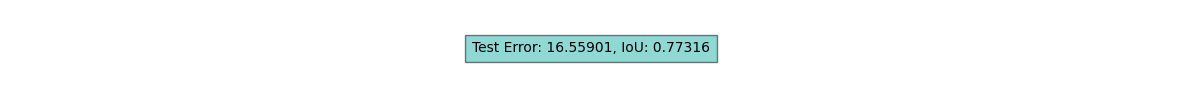

CPU times: user 57.9 s, sys: 1.32 s, total: 59.2 s
Wall time: 46.3 s


In [7]:
%%time
set_seed()
vae4 = VAE_CPD_NN(dataset='MNIST', rank=72, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
reduction(vae1, vae4)
vae4.load_and_plot('Models/MNIST/cpd_nn.pth', train_loader, val_loader) # coef=10**-3
vae4.test(test_loader, coef=0)

### mVAE-CPD-NN

Number of parameters: 50700 (-3.65%)
Model loaded from Models/MNIST/mcpd_nn.pth


<IPython.core.display.Latex object>

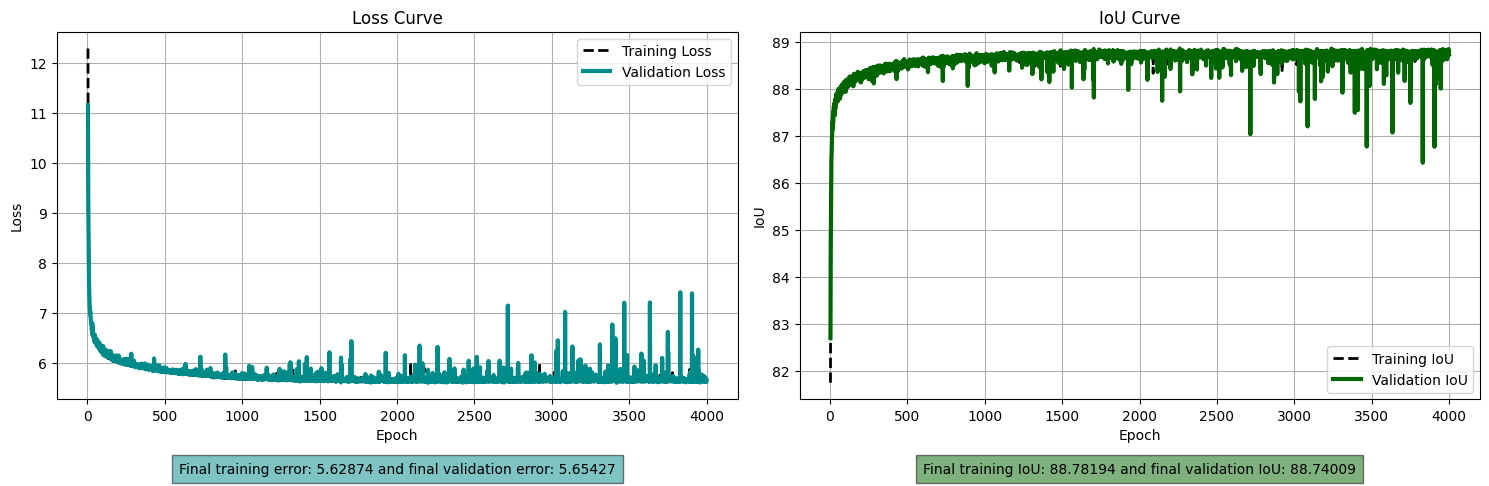

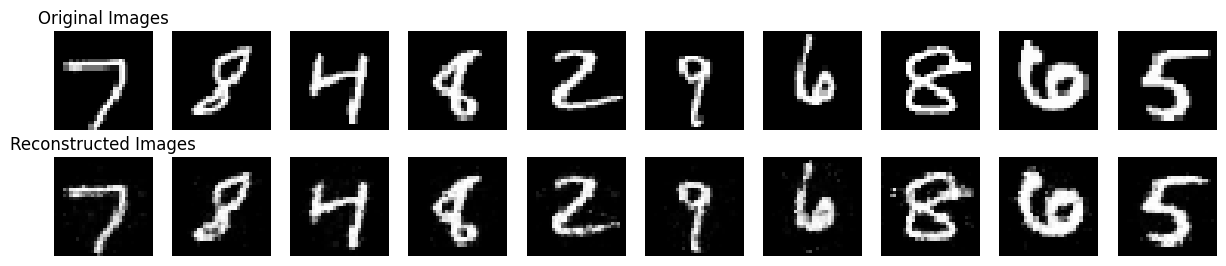

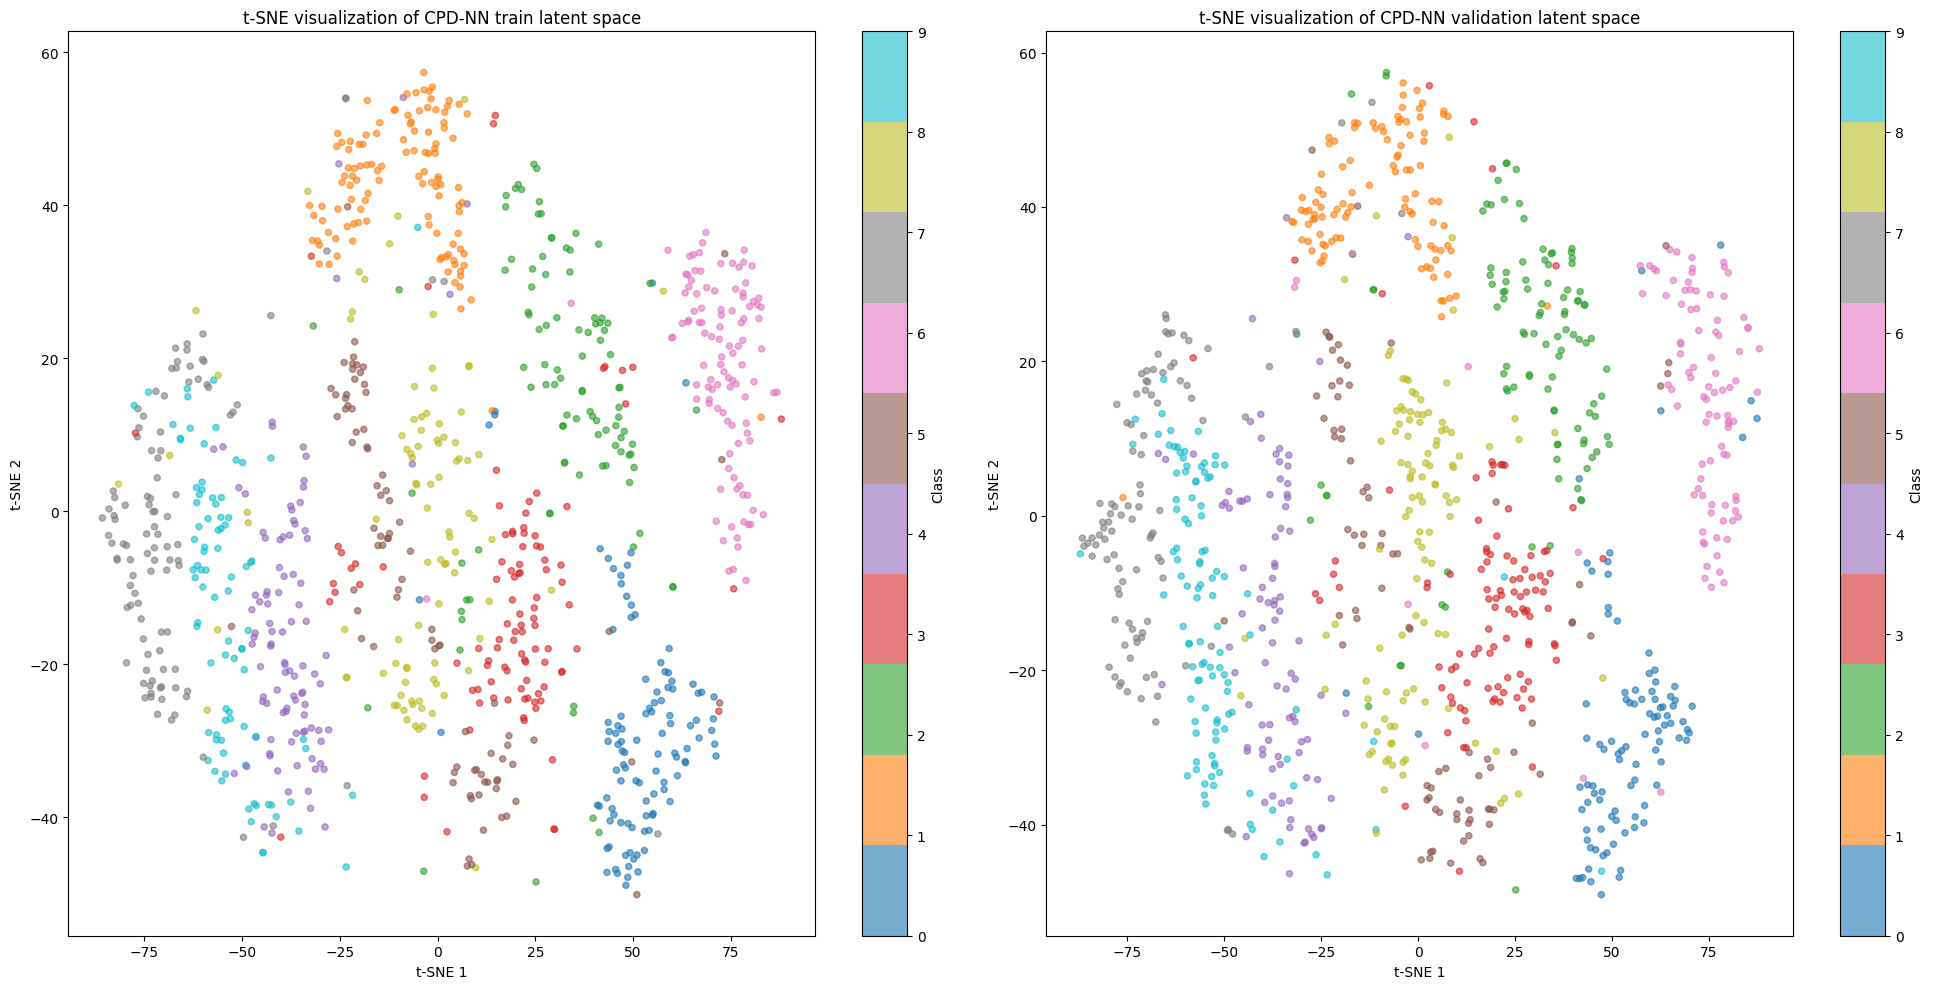

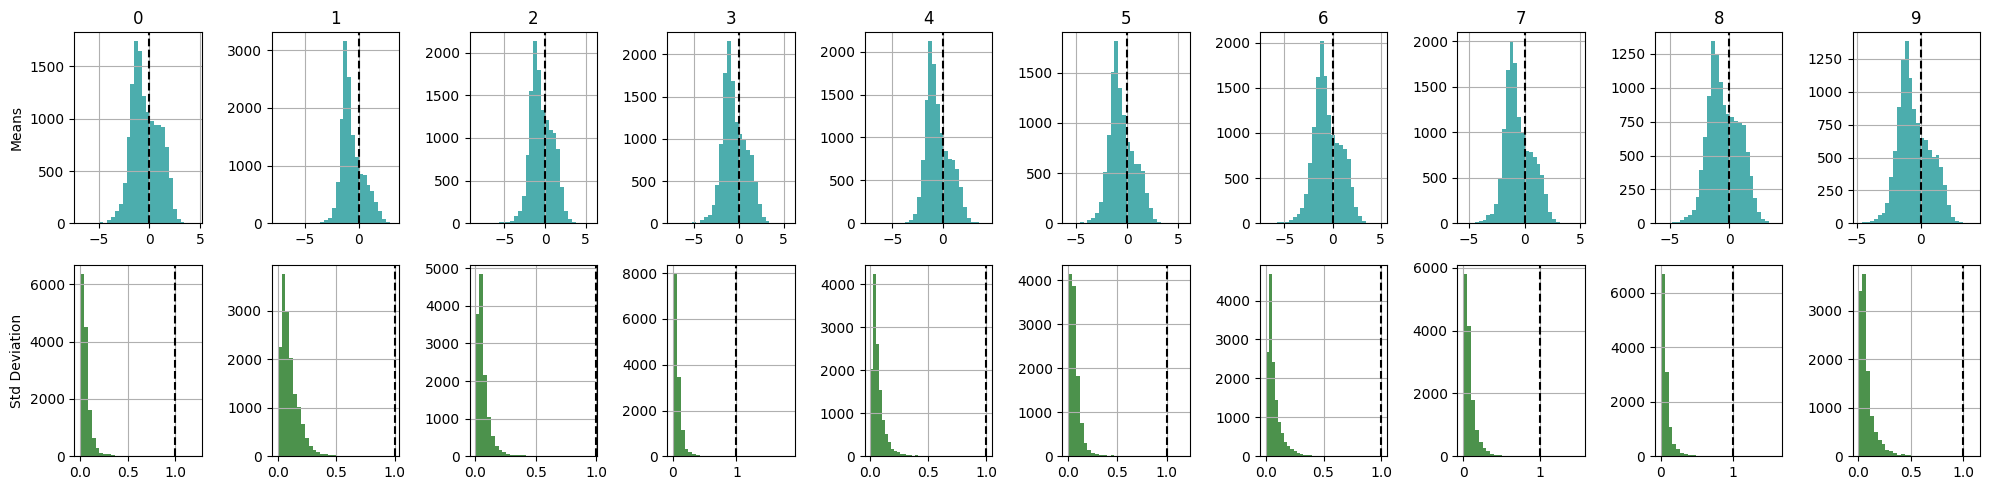

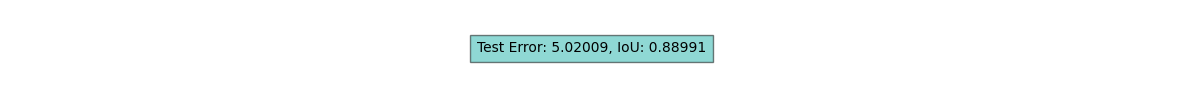

CPU times: user 1min 6s, sys: 1.45 s, total: 1min 8s
Wall time: 52.1 s


In [8]:
%%time
set_seed()
vae4m = VAE_CPD_NN(dataset='MNIST', rank=130, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[], encod='Matrices')
reduction(vae1, vae4m)
vae4m.load_and_plot('Models/MNIST/mcpd_nn.pth', train_loader, val_loader) # coef=10**-3
vae4m.test(test_loader, coef=0)

### sVAE-CPD-NN

Number of parameters: 51620 (-1.90%)
Model loaded from Models/MNIST/scpd_nn.pth


<IPython.core.display.Latex object>

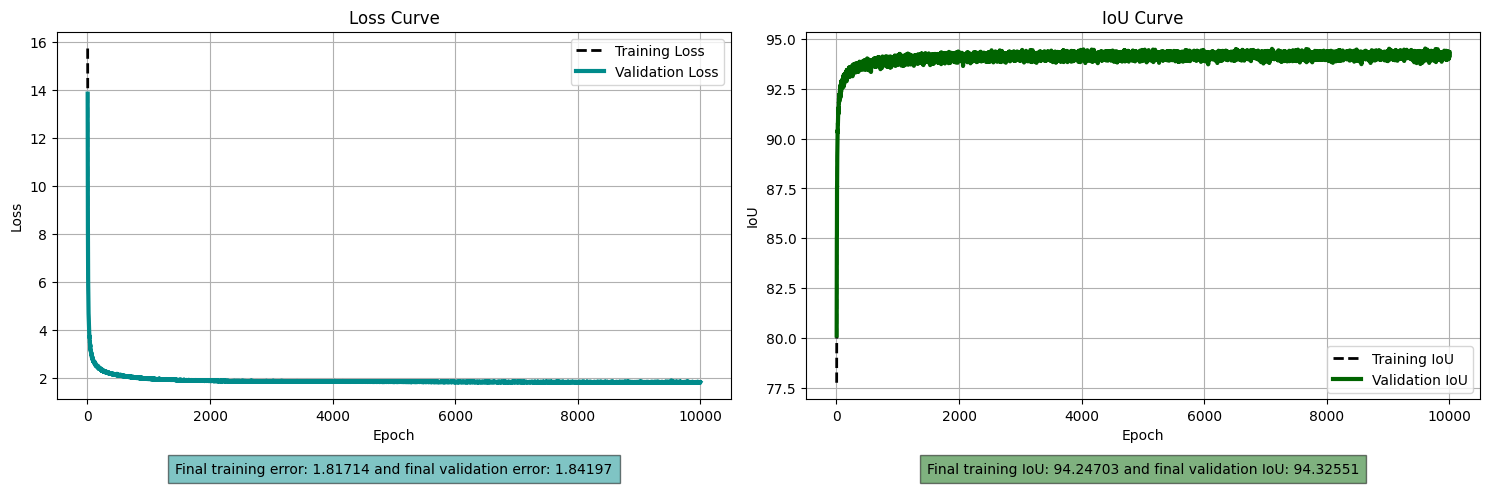

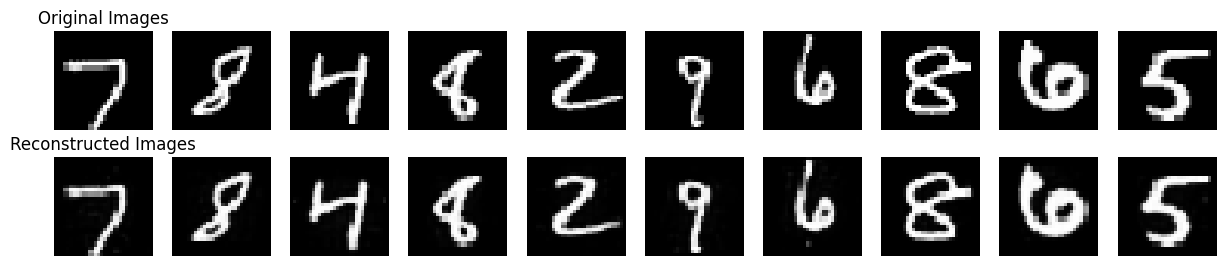

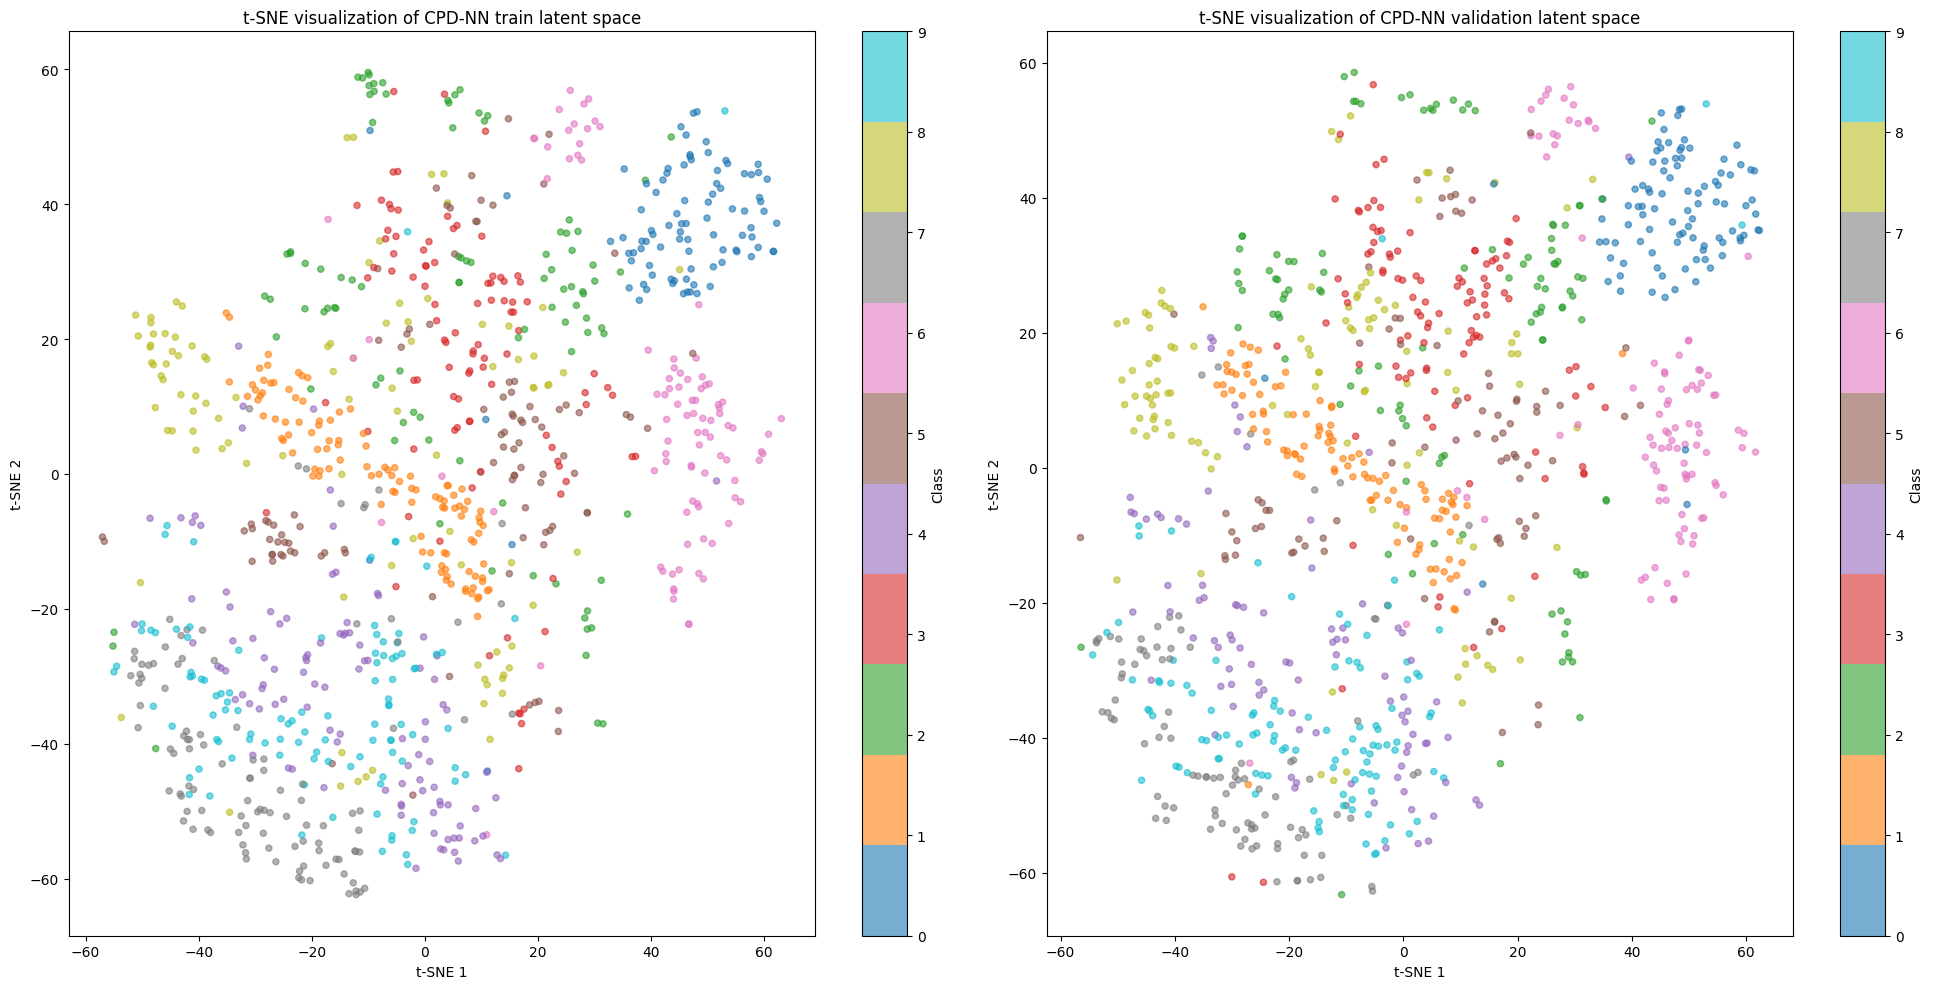

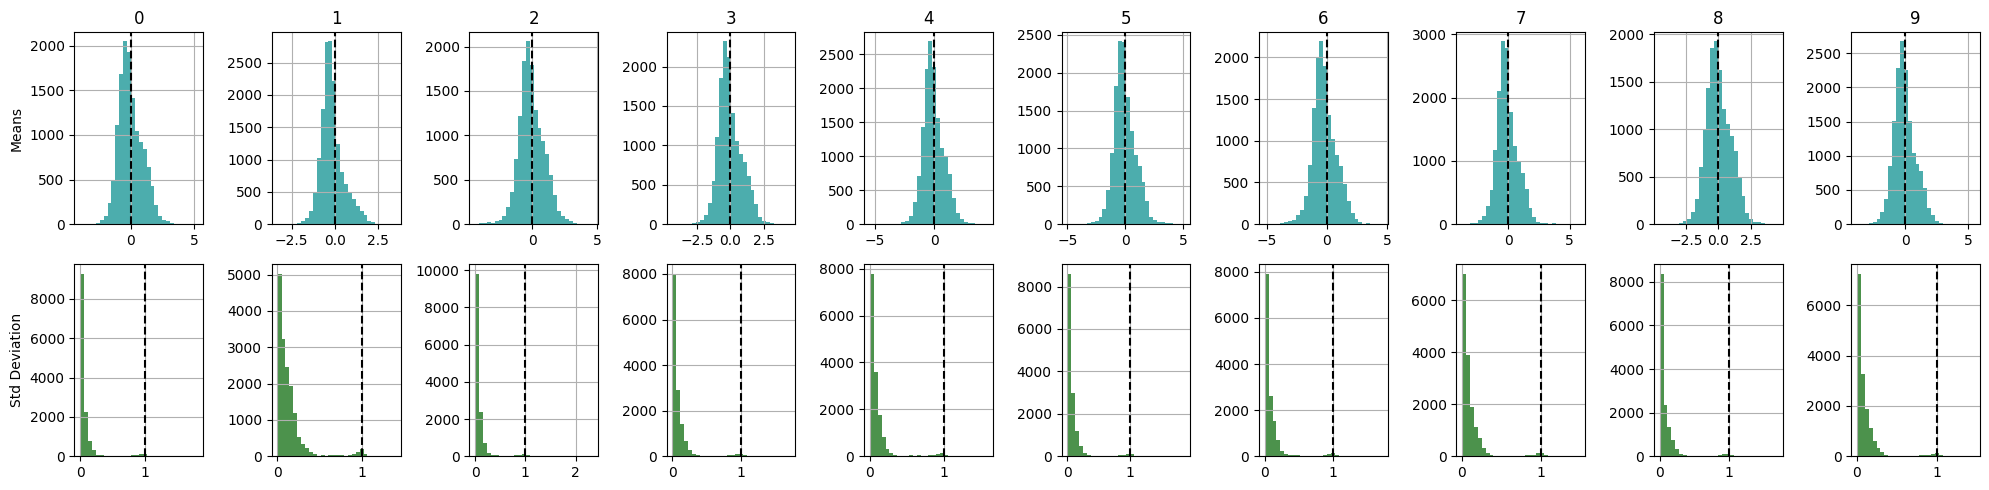

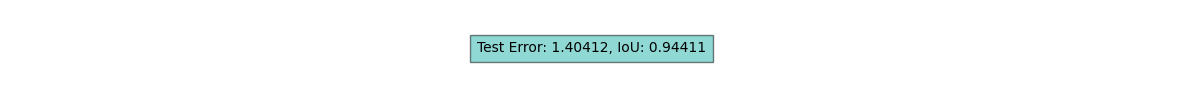

CPU times: user 56.8 s, sys: 1.83 s, total: 58.6 s
Wall time: 42.7 s


In [9]:
%%time
set_seed()
vae4s = VAE_CPD_NN(dataset='MNIST', rank=145, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[], encod='Symmetric')
reduction(vae1, vae4s)
vae4s.load_and_plot('Models/MNIST/scpd_nn.pth', train_loader, val_loader) # coef=10**-3
vae4s.test(test_loader, coef=0)

## Classification

### Classic VAE

Model loaded from Models/MNIST/classic_cl.pth


<IPython.core.display.Latex object>

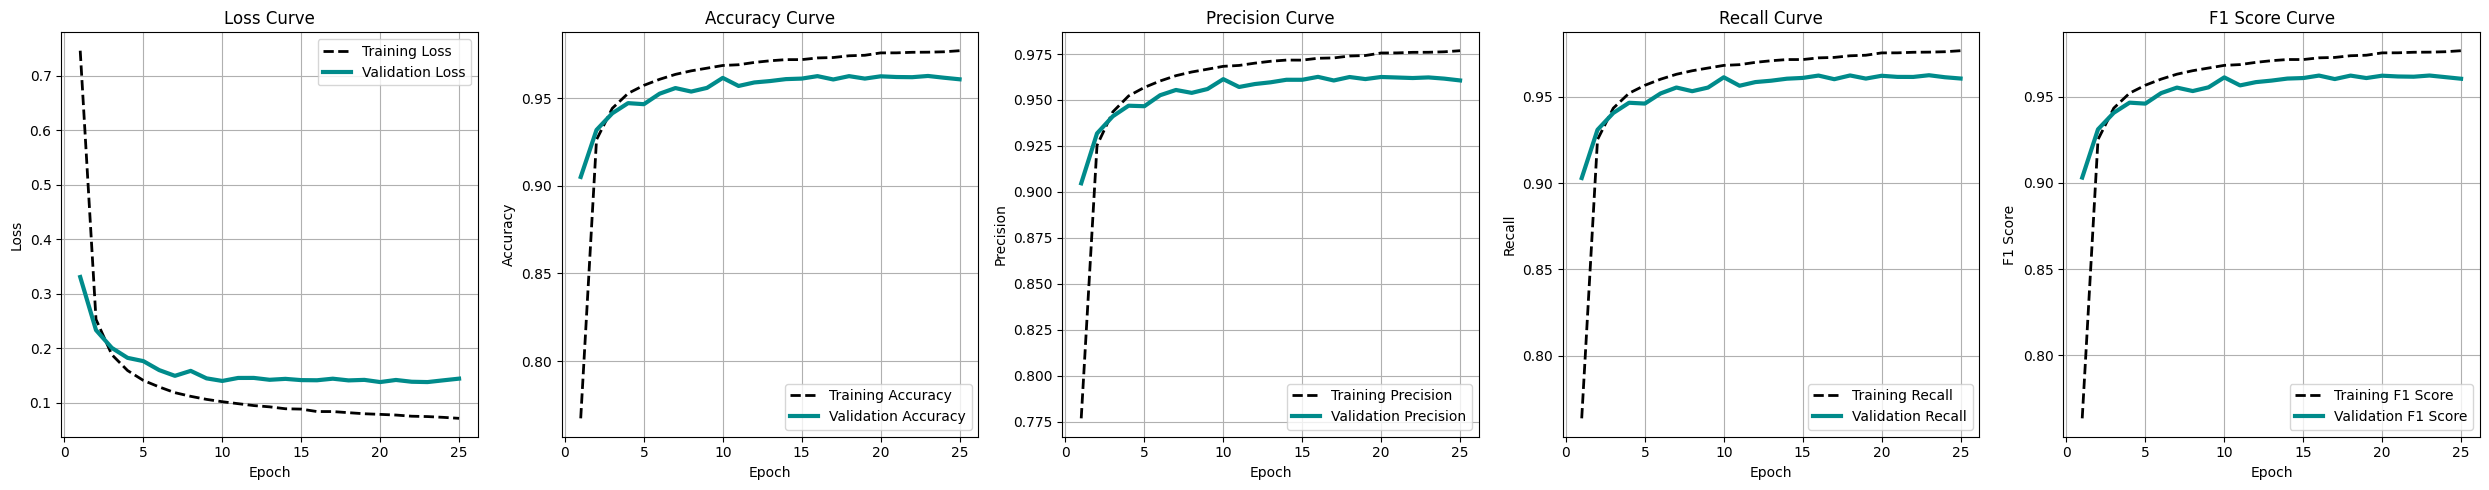

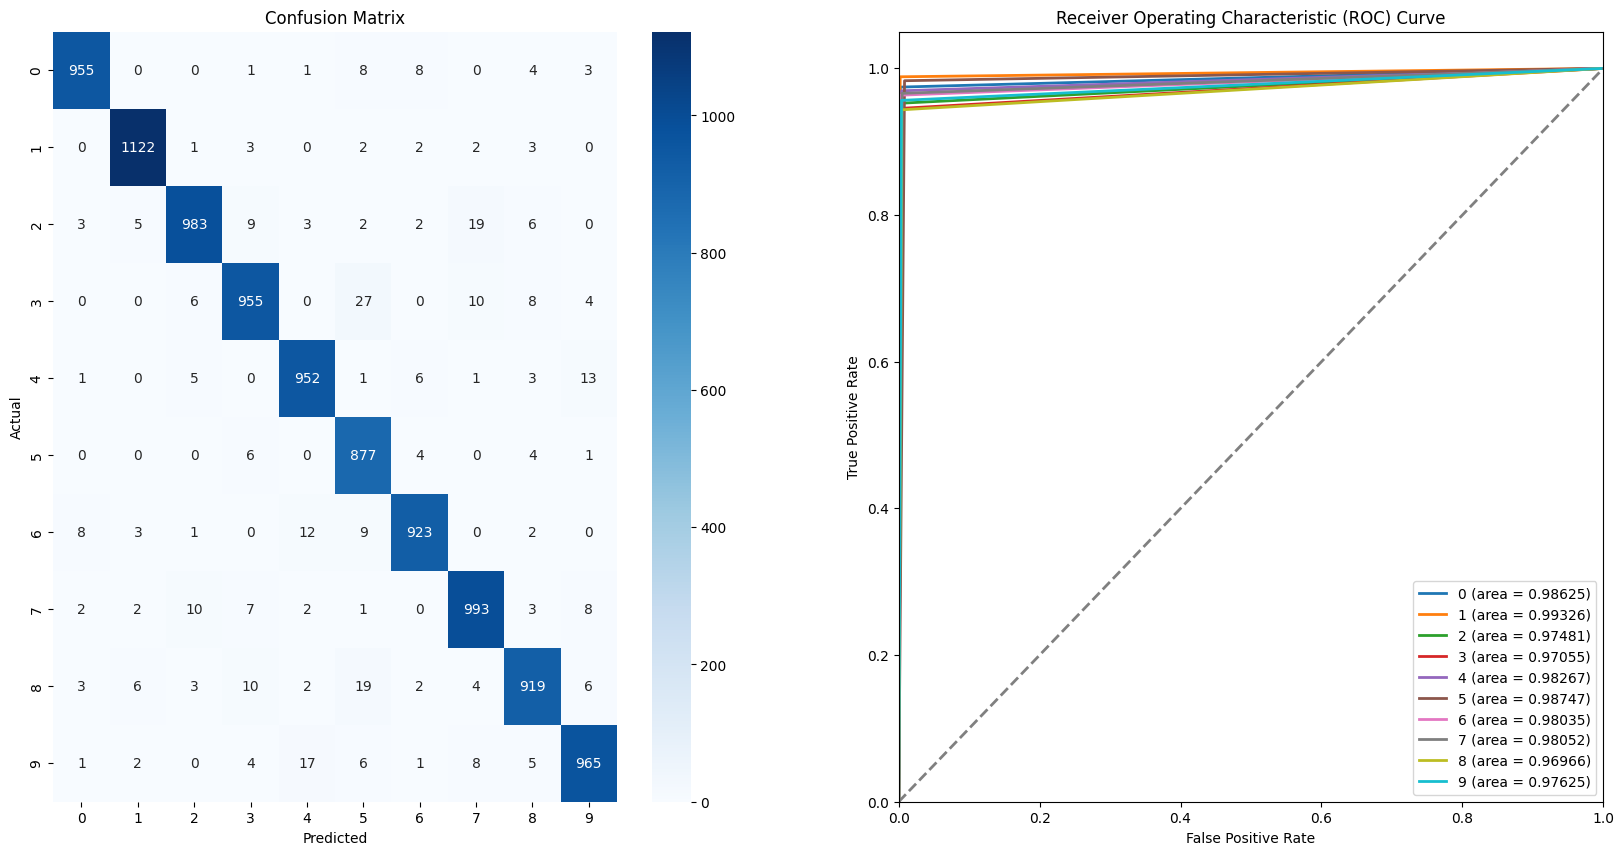

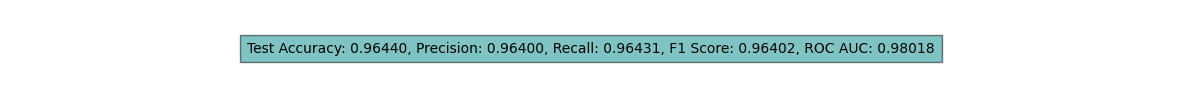

CPU times: user 4.54 s, sys: 296 ms, total: 4.83 s
Wall time: 3.63 s


In [10]:
%%time
set_seed()
cl1 = Classifier(vae1, dataset='MNIST')
cl1.load_and_plot('Models/MNIST/classic_cl.pth', test_loader)

### VAE-NMF

Model loaded from Models/MNIST/nmf_cl.pth


<IPython.core.display.Latex object>

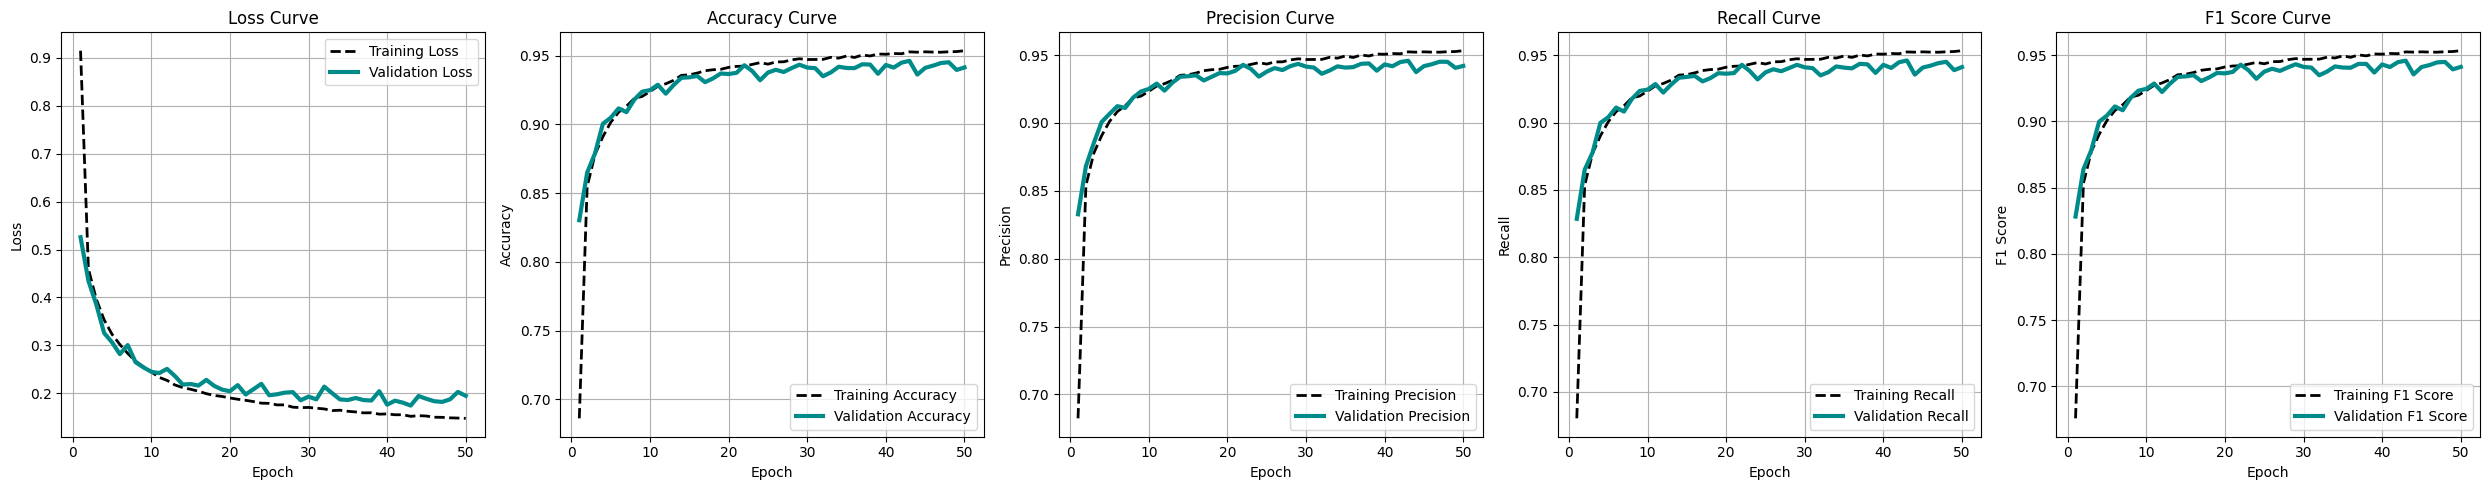

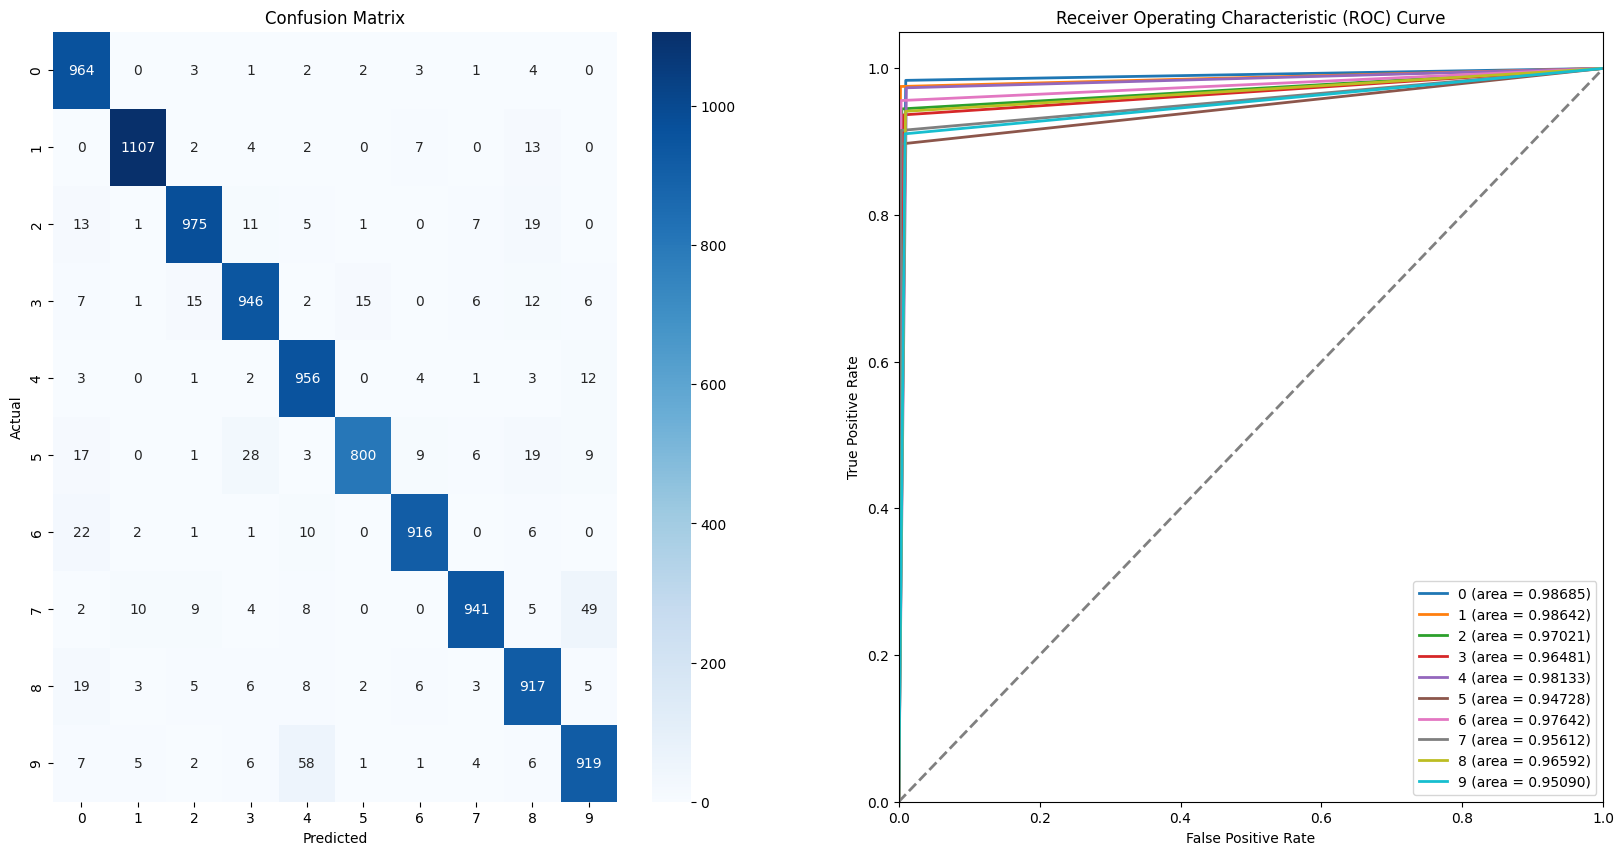

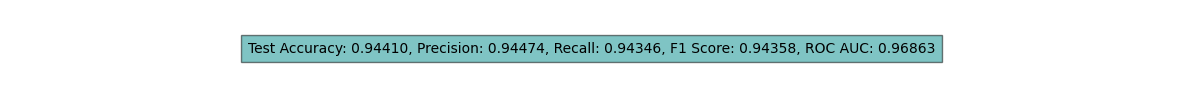

CPU times: user 4.09 s, sys: 375 ms, total: 4.46 s
Wall time: 3.13 s


In [11]:
%%time
set_seed()
cl2 = Classifier(vae2, dataset='MNIST', input_dim=32*3)
cl2.load_and_plot('Models/MNIST/nmf_cl.pth', test_loader)

### VAE-NTD

Model loaded from Models/MNIST/ntd_cl.pth


<IPython.core.display.Latex object>

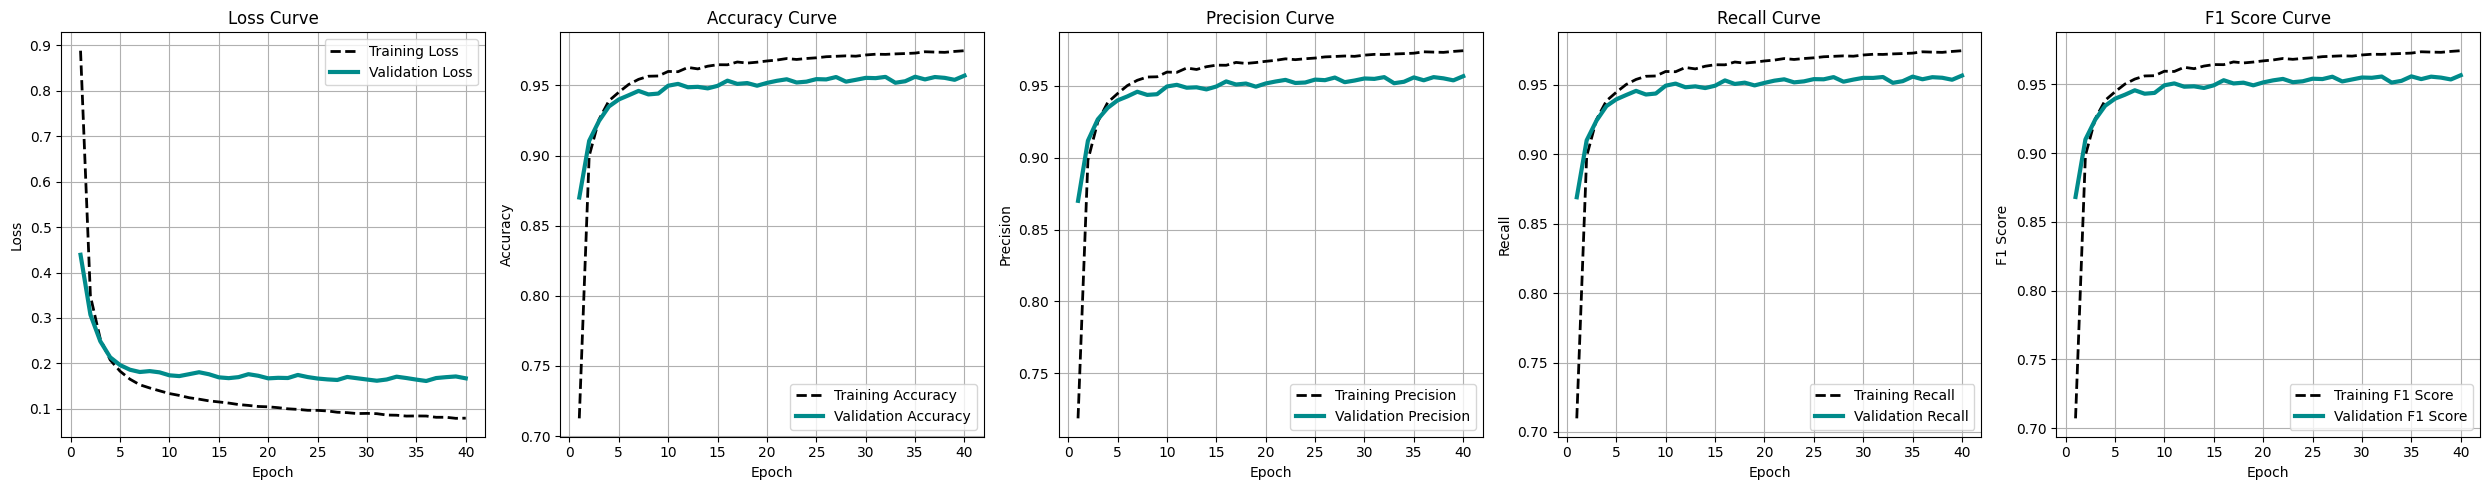

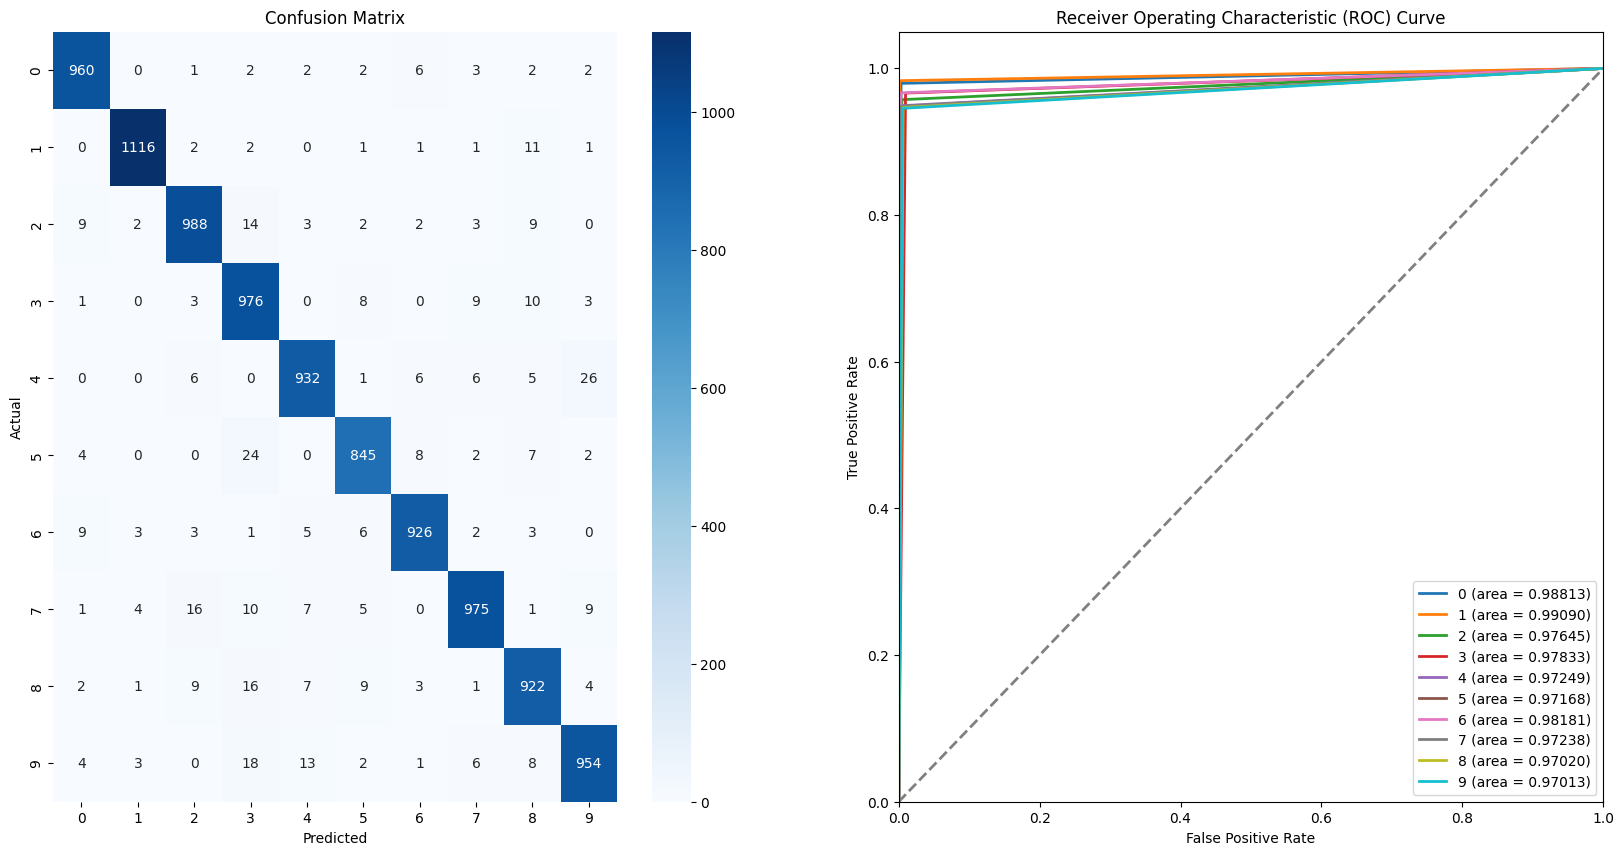

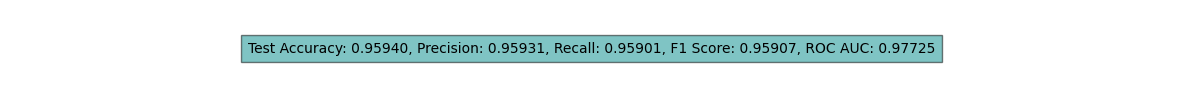

CPU times: user 4.29 s, sys: 327 ms, total: 4.62 s
Wall time: 3.22 s


In [12]:
%%time
set_seed()
cl3 = Classifier(vae3, dataset='MNIST', input_dim=72)
cl3.load_and_plot('Models/MNIST/ntd_cl.pth', test_loader)

### VAE-CPD-NN

Model loaded from Models/MNIST/cpd_nn_cl.pth


<IPython.core.display.Latex object>

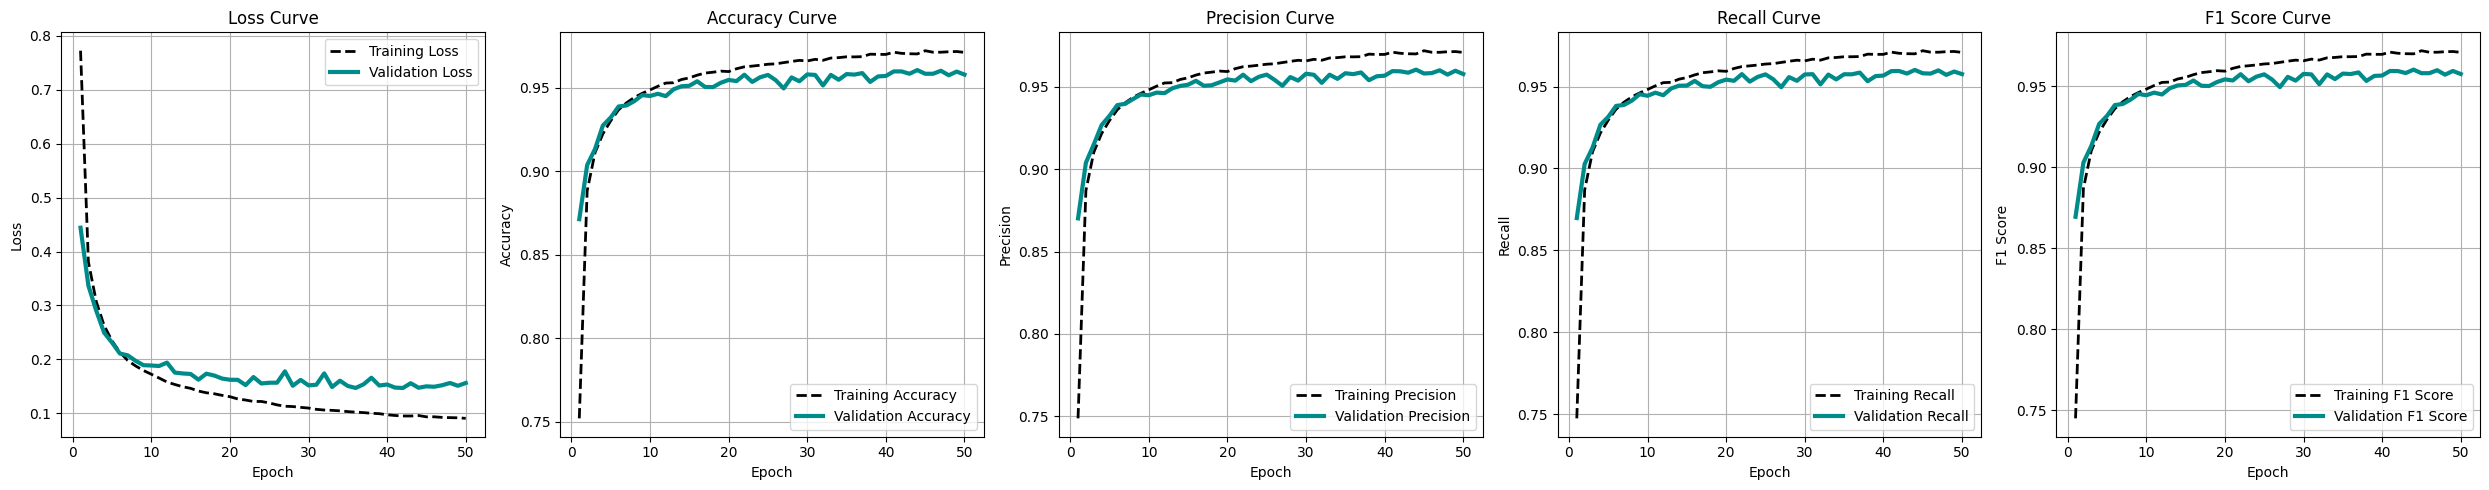

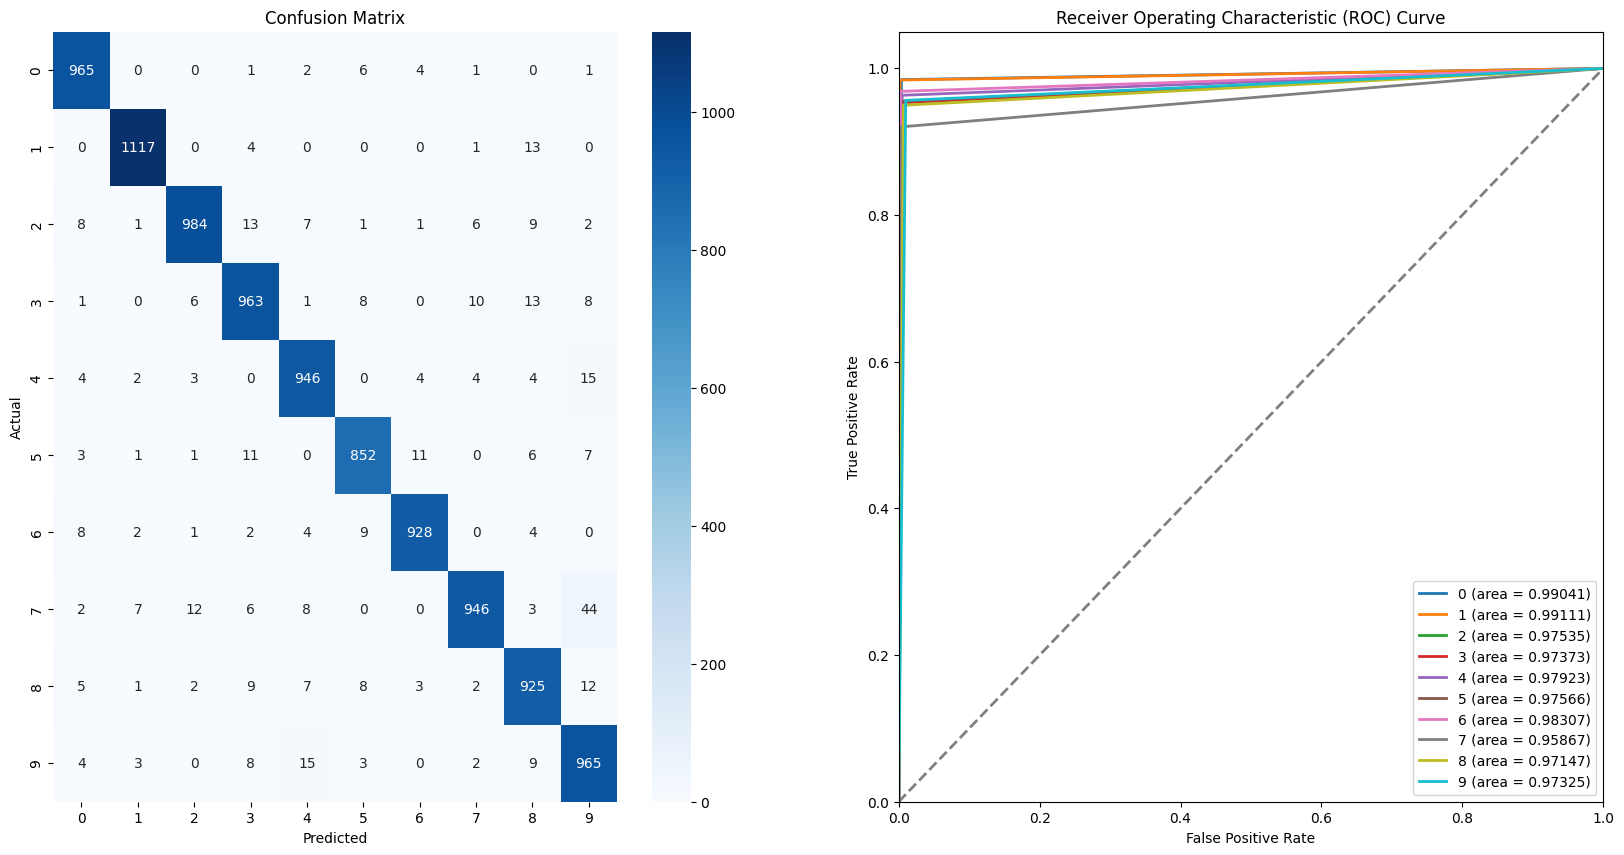

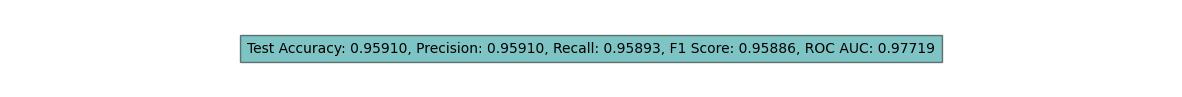

CPU times: user 4.49 s, sys: 358 ms, total: 4.84 s
Wall time: 3.46 s


In [13]:
%%time
set_seed()
cl4 = Classifier(vae4, dataset='MNIST', input_dim=72)
cl4.load_and_plot('Models/MNIST/cpd_nn_cl.pth', test_loader)

### mVAE-CPD-NN

Model loaded from Models/MNIST/mcpd_nn_cl.pth


<IPython.core.display.Latex object>

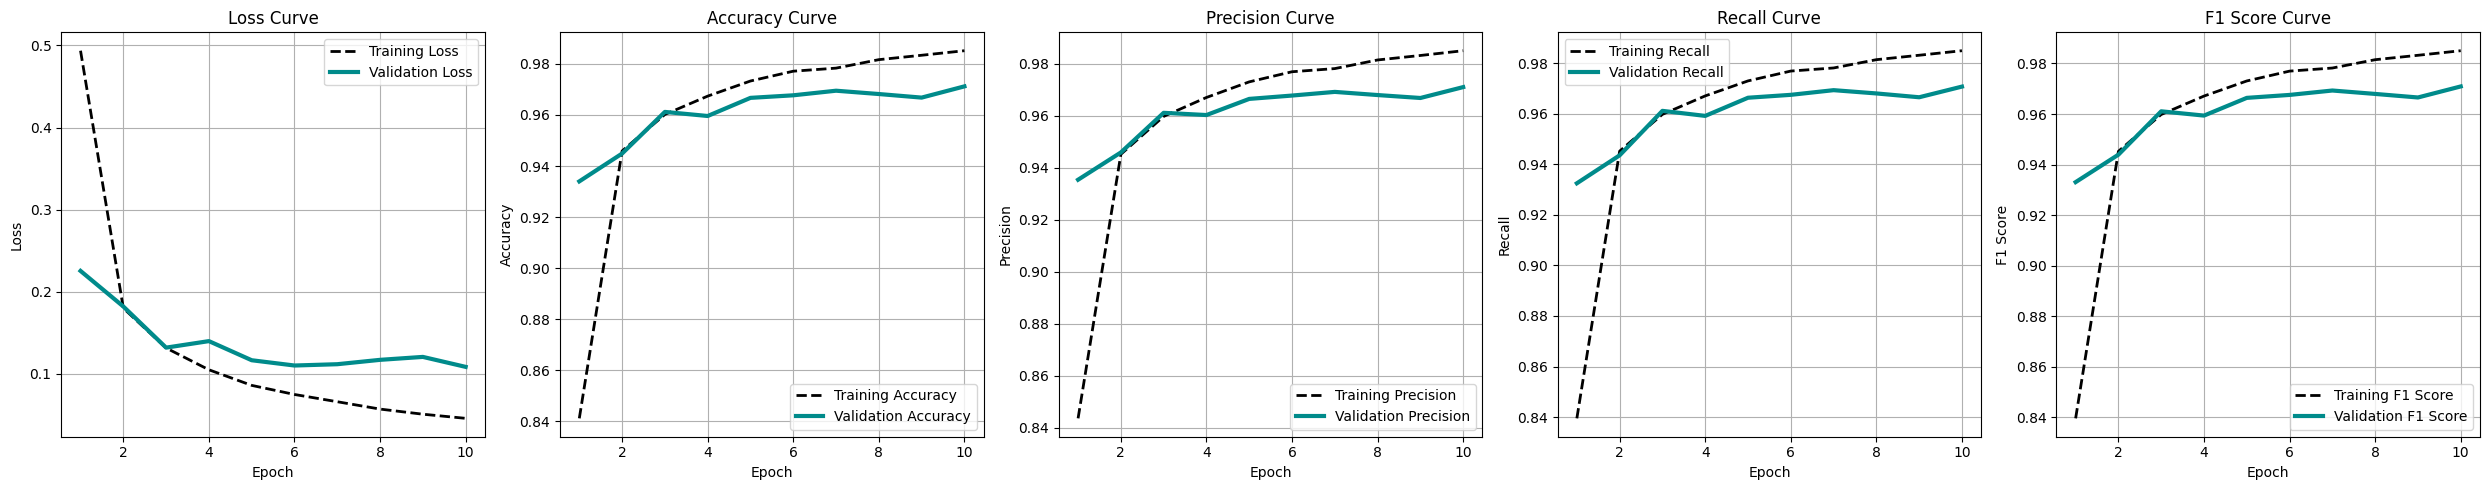

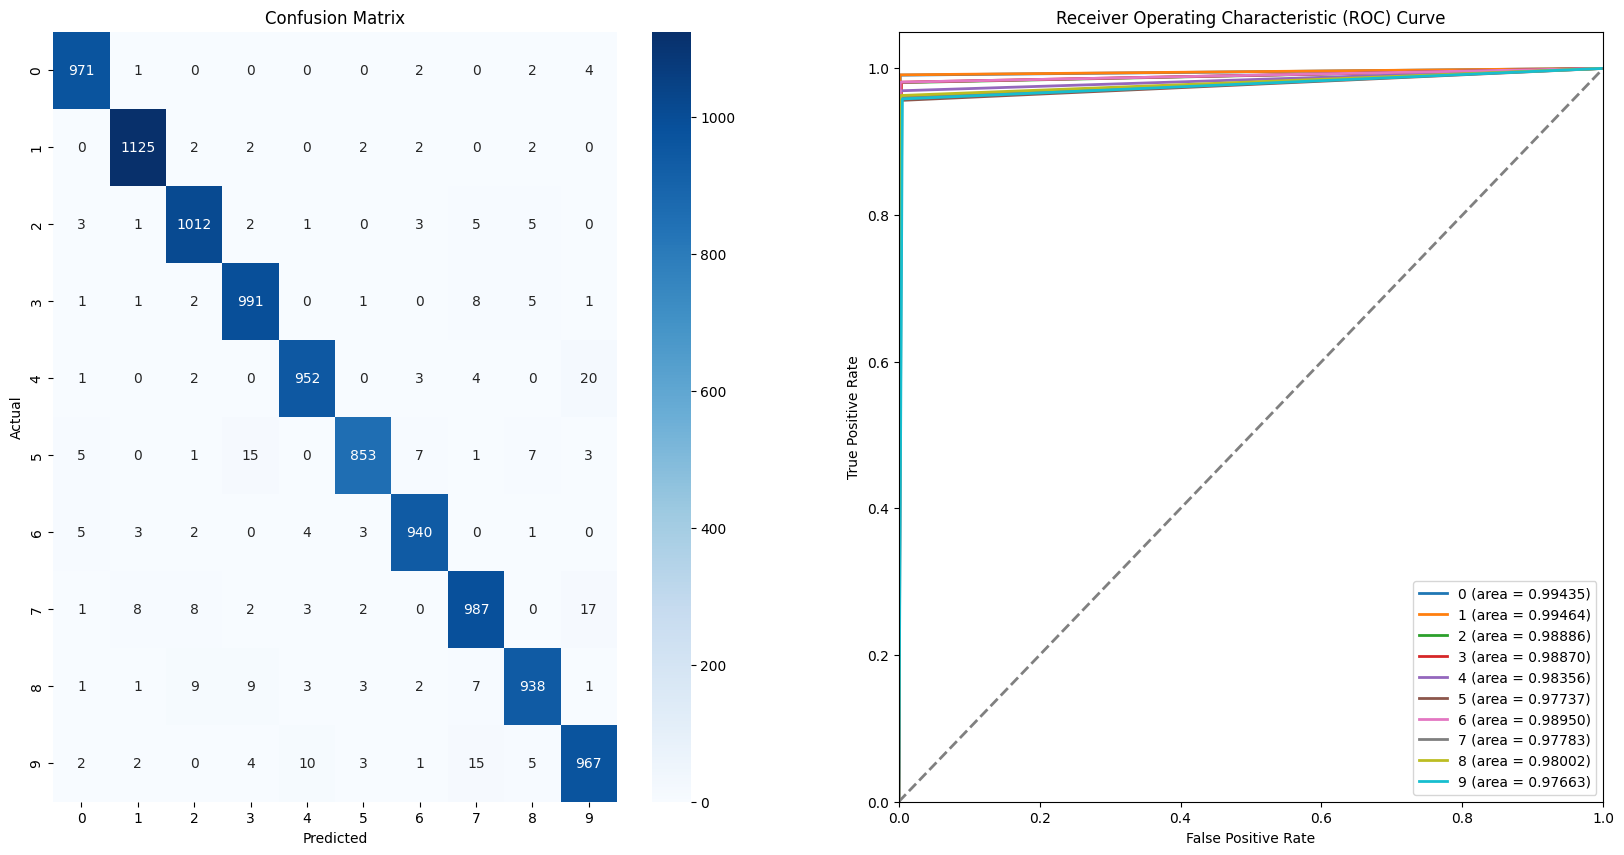

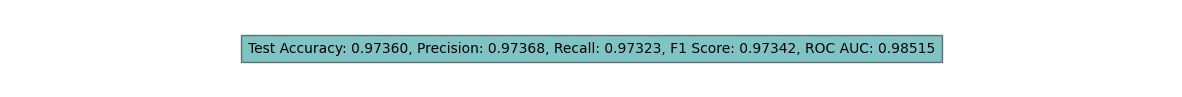

CPU times: user 4 s, sys: 332 ms, total: 4.33 s
Wall time: 3.12 s


In [14]:
%%time
set_seed()
cl4m = Classifier(vae4m, dataset='MNIST', input_dim=130)
cl4m.load_and_plot('Models/MNIST/mcpd_nn_cl.pth', test_loader)

### sVAE-CPD-NN

Model loaded from Models/MNIST/scpd_nn_cl.pth


<IPython.core.display.Latex object>

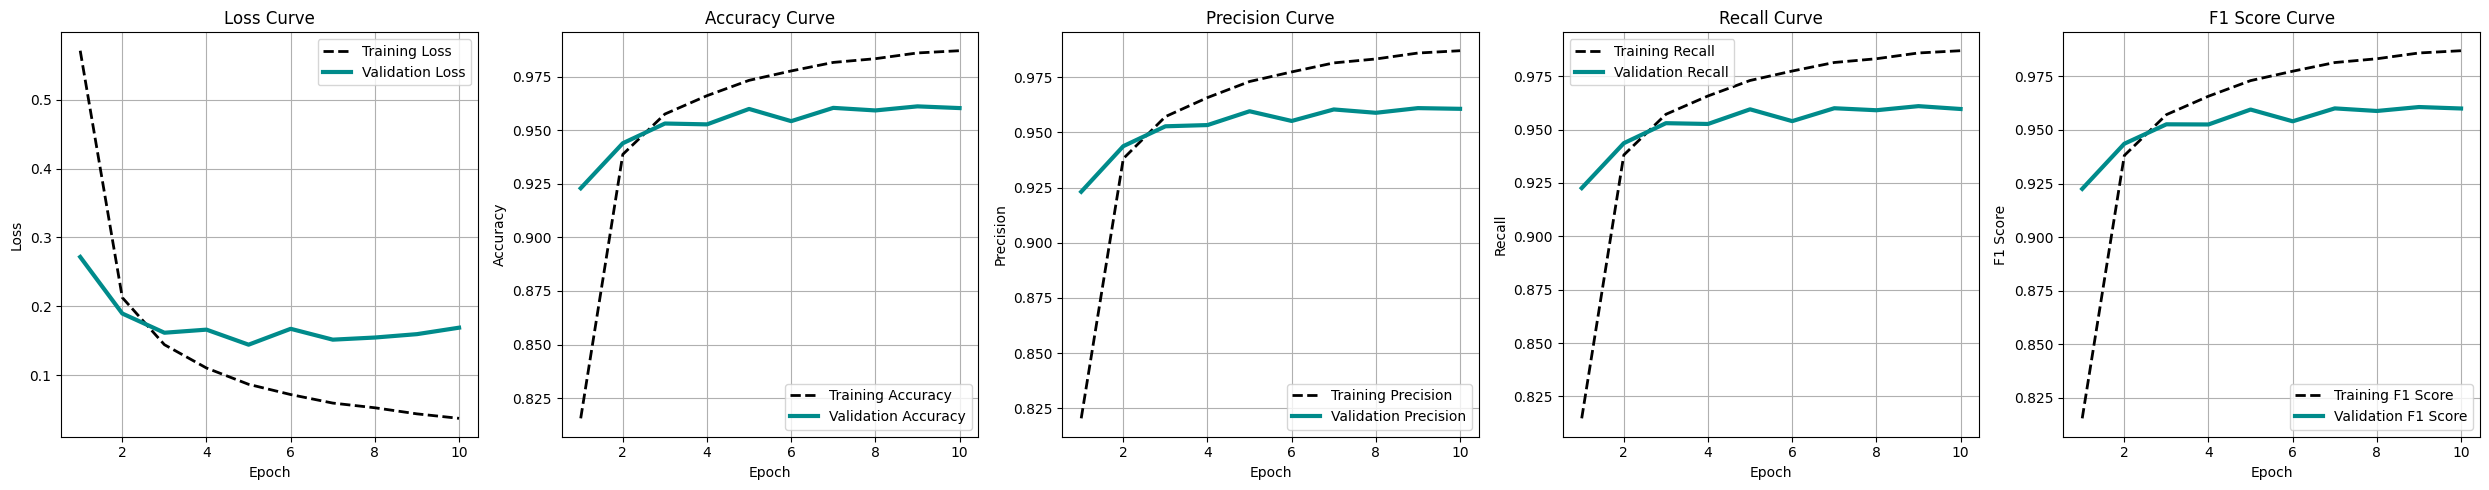

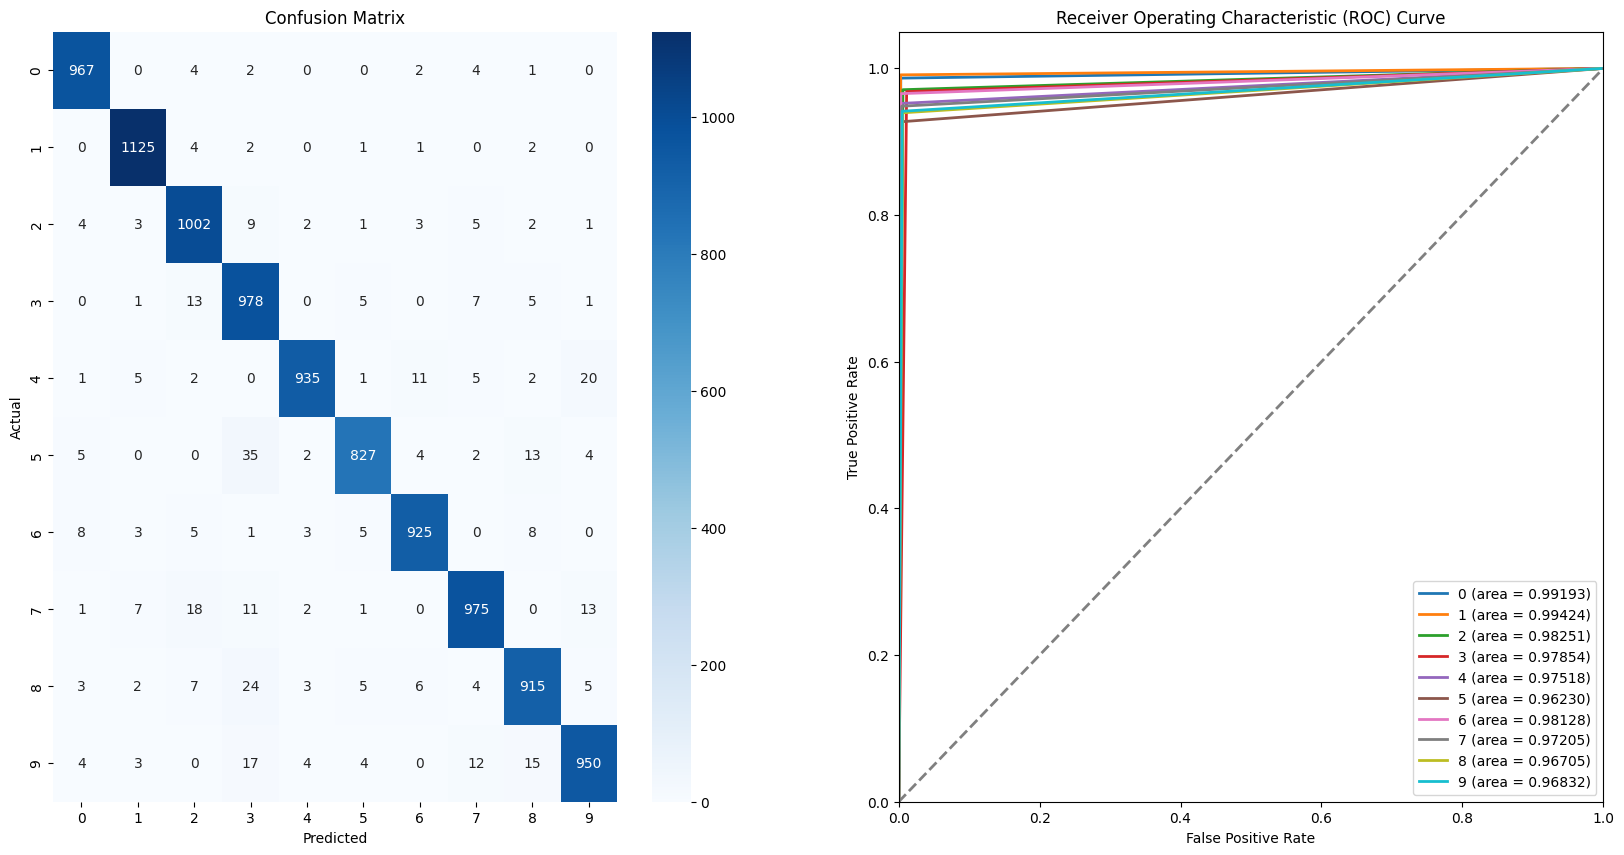

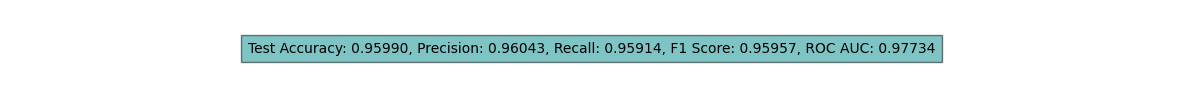

CPU times: user 5.25 s, sys: 323 ms, total: 5.58 s
Wall time: 3.74 s


In [15]:
%%time
set_seed()
cl4s = Classifier(vae4s, dataset='MNIST', input_dim=145)
cl4s.load_and_plot('Models/MNIST/scpd_nn_cl.pth', test_loader)